In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
import os
import scipy
import scipy.stats as stats
from scipy.stats import pearsonr
from itertools import combinations

In [2]:
related_hpo_term = ["Abnormality of body mass index", "Abnormality of body height", "increased inflamatory response", "increased inflamatory response",
                    "Abnormal systemic blood pressure","Abnormal systemic blood pressure", "Abnormal systemic blood pressure", "Abnormality of the cardiovascular system",
                    "Abnormal renal physiology", "Increased inflammatory response", "Abonormality of the skeletal system",
                    "Neoplasm", "increased inflamatory response", "increased inflamatory response", "Behavior abnormality", "Behavior abnormality",
                    "Involuntary movements", "Abnormality HDL cholesterol concentration", "Abnormality LDL cholesterol concentration", "Abnormal circulating cholesterol concentration",
                    "Abnormal circulating cholesterol concentration", "Neoplasm", "Abnormal basophil count", "Abnormal eosophil count", "Abnormal hematocrit", "Anemia",
                    "Abnormal lymphocyte count", "Abnormal mean corpuscular hemoglobin concentration", "Abnormal hemaglobin", "Abnormal mean corpuscular volume", "Abnormal monocyte count",
                    "Abnormal platelet volume", "Abnormal neutrophil count", "Abnormal platelet count", "Abnormal erythrocyte morphology", "Abnormal erythrocyte morphology", "Abnormal leukocyte count",
                    "Increased inflammatory response", "Diabetes melitys", "Abnormal C-reactive protein level", "Neurodevelopmental abnormality", "Motor neuron atrophy",
                    "Neoplasm", "Neoplasm"
                   ]

gwas_traits = ["Body mass index", "Height", "Inflammatory bowel disease", "Coeliac disease", 
              "Diastolic blood pressure", "Systolic blood pressure", "Pulse pressure", "Coronary artery disease", "Glomerular filtration rate",
              "Rheumatoid arthritis", "Heel bone mineral density", "Breast cancer", "Asthma", "Multiple sclerosis", "Major depressive disorder",
               "Schizophrenia", "Parkinsons disease", "HDL cholesterol", "LDL cholesterol", "Total cholesterol", "Triglycerides", "Prostate cancer",
               "Basophils", "Eosinophils", "Hematocrit", "Hemaglobin", "Lymphocytes", "Mean corpuscular hemoglobin concentration", 
               "Mean corpuscular hemaglobin", "Mean corpusvular volume", "Monocytes", "Mean platelet volume", "Neutrophils", "Platelets",
               "Red blood cells", "Red cell distribution width", "White blood cells", "Type 1 diabetes", "Type 2 diabetes", "C-reactive protein",
               "Educational attainment", "Amyotrophic", "Colorectal", 'Endometrial'
              ]

hpo_id = ["HP:0045081","HP:0000002","HP:0012649","HP:0012649","HP:0030972","HP:0030972","HP:0030972",
          "HP:0001626","HP:0012211","HP:0012649","HP:0000924","HP:0002664", "HP:0012649", "HP:0012649",
          "HP:0000708", "HP:0000708", "HP:0004305", "HP:0031888", "HP:0031886", "HP:0003107","HP:0003107",
          "HP:0002664", "HP:0031806", "HP:0020064", "HP:0031850", "HP:0001903", "HP:0040088", "HP:0025546", 
          "HP:0011902", "HP:0025065", "HP:0012310", "HP:0011876", "HP:0011991", "HP:0011873", "HP:0001877", 
          "HP:0001877", "HP:0011893","HP:0012649", "HP:0000819", "HP:0032436", "HP:0012759", "HP:0007373", 
          "HP:0002664", "HP:0002664"]


gwas_hpo_info = pd.DataFrame({"GWAS trait": gwas_traits, "Related HPO term": related_hpo_term,
                             "HPO ID": hpo_id})
gwas_hpo_info

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID  
0                      Abnormality of body mass index  HP:0045081  
1                          Abnormality of body height  HP:0000002  
2                      increased inflamatory response  HP:0012649  
3                      increased inflamatory response  HP:0012649  
4                    Abnormal systemic blood pressure  HP:0030972  
5                    Abnormal systemic blood pressure  HP:0030972  
6                    Abnormal systemic blood pressure  HP:0030972  
7            Abnormality of the cardiovascular system  HP:0001626  
8                           Abnormal renal physiology  HP:0012211  
9                     Increased inflammatory response  HP:0012649  
10                Abonormality of the skeletal system  HP:0000924  
11                                           Neoplasm  HP:0002664  
12                     increased inflamatory response  HP:0012649  
13                     increased inflamatory response  HP:0012649  
14                               Behavior abnormality  HP:0000708  
15                               Behavior abnormality  HP:0000708  
16                              Involuntary movements  HP:0004305  
17          Abnormality HDL cholesterol concentration  HP:0031888  
18          Abnormality LDL cholesterol concentration  HP:0031886  
19     Abnormal circulating cholesterol concentration  HP:0003107  
20     Abnormal circulating cholesterol concentration  HP:0003107  
21                                           Neoplasm  HP:0002664  
22                            Abnormal basophil count  HP:0031806  
23                            Abnormal eosophil count  HP:0020064  
24                                Abnormal hematocrit  HP:0031850  
25                                             Anemia  HP:000

## Load in HPO data

In [3]:
HPO = r"C:\Users\stijn\Documents\Master_DSLS\Semester_two\project\HPO\phenotype_to_genes_V1268_OMIMandORPHA.txt_matrix.txt.gz"

In [4]:
hpo_data = pd.read_csv(HPO, compression='gzip', sep="\t")

In [5]:
hpo_data.set_index('-', inplace=True)

In [6]:
print(hpo_data.shape)
hpo_data.head()

(56435, 8853)


HP:0001187  HP:0009902  HP:0025152  HP:0009905  HP:0009904  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   

                 HP:0001188  HP:0009907  HP:0025158  HP:0001182  HP:0009906  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   

                 ...  HP:0000558  HP:0001889  HP:0000553  HP:0001884  \
-                ...                                                   
ENSG00000000003  ...         0.0         0.0         0.0         0.0   
ENSG00000000005  ...         0.0         0.0         0.0         0.0   
ENSG00000000419  ...         0.0         0.0         0.0         0.0   
ENSG00000000457  ...         0.0         0.0         0.0         0.0   
ENSG00000000460  ...         0.0         0.0         0.0         0.0   

                 HP:0001883  HP:0000552  HP:0000555  HP:0001886  HP:0000554  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   

                 HP:0001885  
-                            
ENSG00000000003         0.0  
ENSG00000000005         0.0  
ENSG00000000419         0.0  
ENSG00000000457         0.0  
ENSG00000000460         0.0  

[5 rows x 8853 columns]

## Load in NetWas


### Height

In [7]:
gene_list = r"C:\Users\stijn\Documents\Master_DSLS\Semester_two\project\software_methods\NetWas\results\height\height_netwas_ensembl.csv"
netwas_results = pd.read_csv(gene_list, sep=",")
netwas_results.head()

gene_symbol      ensemble_id  netwas_score
0      PSMD14  ENSG00000115233       1.83057
1        BAG5  ENSG00000166170       1.59962
2       PSMC2  ENSG00000161057       1.58221
3       COPB1  ENSG00000129083       1.51182
4        CBX3  ENSG00000122565       1.51087

In [8]:
def get_overlapping_genes(hpo_data, genes):
    overlapping_genes_data = hpo_data[hpo_data.index.isin(genes)]
    overlapping_genes = overlapping_genes_data.index
    total_overlap = overlapping_genes.shape[0]

    # Only keep the genes that overlap with HPO
    overlap_genes = genes[genes.isin(overlapping_genes)]
    
    # Only keep releveant HPO data
    overlap_hpo = hpo_data[hpo_data.index.isin(overlapping_genes)]
    return overlap_hpo, overlap_genes, total_overlap

In [9]:
overlap_hpo, netwas_genes, total_overlap = get_overlapping_genes(hpo_data, netwas_results.ensemble_id)

overlap_netwas = netwas_results[netwas_results.ensemble_id.isin(netwas_genes)]
overlap_netwas

gene_symbol      ensemble_id  netwas_score
0          PSMD14  ENSG00000115233      1.830570
1            BAG5  ENSG00000166170      1.599620
2           PSMC2  ENSG00000161057      1.582210
3           COPB1  ENSG00000129083      1.511820
4            CBX3  ENSG00000122565      1.510870
...           ...              ...           ...
18676       ACSL3  ENSG00000123983     -0.726917
18677     TSC22D1  ENSG00000102804     -0.747651
18678       ATAD2  ENSG00000156802     -0.750327
18679      ATP1B1  ENSG00000143153     -0.848154
18680       ITPR1  ENSG00000150995     -0.950347

[17479 rows x 3 columns]

In [10]:
threshold = 0.5
significant_netwas = overlap_netwas[overlap_netwas.netwas_score > threshold]
significant_netwas

gene_symbol      ensemble_id  netwas_score
0         PSMD14  ENSG00000115233      1.830570
1           BAG5  ENSG00000166170      1.599620
2          PSMC2  ENSG00000161057      1.582210
3          COPB1  ENSG00000129083      1.511820
4           CBX3  ENSG00000122565      1.510870
...          ...              ...           ...
1169       NUTF2  ENSG00000102898      0.500600
1170      AKAP10  ENSG00000108599      0.500402
1171        CD59  ENSG00000085063      0.500318
1172       FANCI  ENSG00000140525      0.500248
1173      CACUL1  ENSG00000151893      0.500074

[1108 rows x 3 columns]

In [11]:
def create_table(overlap_genes, gwas_genes, hpo_genes):
    tl = overlap_genes[~overlap_genes.isin(gwas_genes) & ~overlap_genes.isin(hpo_genes)].shape[0]
    bl = overlap_genes[overlap_genes.isin(gwas_genes) & ~overlap_genes.isin(hpo_genes)].shape[0]
    tr = overlap_genes[~overlap_genes.isin(gwas_genes) & overlap_genes.isin(hpo_genes)].shape[0]
    br = overlap_genes[overlap_genes.isin(gwas_genes) & overlap_genes.isin(hpo_genes)].shape[0]
    
    total = tl + bl + tr + br
    
    metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
    metrix.index = ["No GWAS", "Yes GWAS", "sum"]
    return metrix

In [12]:
overlap_hpo

HP:0001187  HP:0009902  HP:0025152  HP:0009905  HP:0009904  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000280789         0.0         0.0         0.0         0.0         0.0   
ENSG00000280969         0.0         0.0         0.0         0.0         0.0   
ENSG00000281106         0.0         0.0         0.0         0.0         0.0   
ENSG00000282419         0.0         0.0         0.0         0.0         0.0   
ENSG00000282608         0.0         0.0         0.0         0.0         0.0   

                 HP:0001188  HP:0009907  HP:0025158  HP:0001182  HP:0009906  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000280789         0.0         0.0         0.0         0.0         0.0   
ENSG00000280969         0.0         0.0         0.0         0.0         0.0   
ENSG00000281106         0.0         0.0         0.0         0.0         0.0   
ENSG00000282419         0.0         0.0         0.0         0.0         0.0   
ENSG00000282608         0.0         0.0         0.0         0.0         0.0   

                 ...  HP:0000558  HP:0001889  HP:0000553  HP:0001884  \
-                ...                                                   
ENSG00000000003  ...         0.0         0.0         0.0         0.0   
ENSG00000000005  ...         0.0         0.0         0.0         0.0   
ENSG00000000419  ...         0.0         0.0         0.0         0.0   
ENSG00000000457  ...         0.0         0.0         0.0         0.0   
ENSG00000000460  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000280789  ...         0.0         0.0         0.0         0.0   
ENSG00000280969  ...         0.0         0.0         0.0         0.0   
ENSG00000281106  ...         0.0         0.0         0.0         0.0   
ENSG00000282419  ...         0.0         0.0         0.0         0.0   
ENSG00000282608  ...         0.0         0.0         0.0         0.0   

                 HP:0001883  HP:0000552  HP:0000555  HP:0001886  HP:0000554  \
-                                                                             
ENSG00000000003         0.0         0.0         0.0         0.0         0.0   
ENSG00000000005         0.0         0.0         0.0         0.0         0.0   
ENSG00000000419         0.0         0.0         0.0         0.0         0.0   
ENSG00000000457         0.0         0.0         0.0         0.0         0.0   
ENSG00000000460         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000280789         0.0         0.0         0.0         0.0         0.0   
ENSG00000280969         0.0         0.0         0.0         0.0         0.0   
ENSG00000281106         0.0         0.0         0.0         0.0         0.0   
ENSG00000282419         0.0         0.0         0.0         0.0         0.0   
ENSG00000282608         0.0         0.0         0.0         0.0         0.0 

In [13]:
def perform_fisher_exact_tests(hpo_data, gene_data, hpo_info):
    hpo_scores = hpo_info.copy()
    odds_ratios = []
    p_values = []
    for hpo in hpo_info["HPO ID"]:

        # test_hpo = hpo_info["HPO ID"][1]
        try: 
            hpo_genes = hpo_data.loc[hpo_data[hpo] == 1, hpo].index
            fisher_data = create_table(hpo_data.index, gene_data, hpo_genes).iloc[0:2, 0:2].values

            OR, p_val = stats.fisher_exact(fisher_data)
        except KeyError:
            OR, p_val = np.nan, np.nan
            
        odds_ratios.append(OR)
        p_values.append(p_val)
        
    hpo_scores["OR"] = odds_ratios
    hpo_scores["pvalues"] = p_values
    zscores = stats.norm.ppf(p_values)
    hpo_scores["zscores"] = np.where(zscores == np.inf, 4, zscores)

    return hpo_scores



In [14]:
netwas_height_fish = perform_fisher_exact_tests(overlap_hpo, significant_netwas.ensemble_id, gwas_hpo_info)
netwas_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID         OR  \
0                      Abnormality of body mass index  HP:0045081  29.602170   
1                          Abnormality of body height  HP:0000002   1.603691   
2                      increased inflamatory response  HP:0012649   1.246370   
3                      increased inflamatory response  HP:0012649   1.246370   
4                    Abnormal systemic blood pressure  HP:0030972   0.771838   
5                    Abnormal systemic blood pressure  HP:0030972   0.771838   
6                    Abnormal systemic blood pressure  HP:0030972   0.771838   
7            Abnormality of the cardiovascular system  HP:0001626   1.385764   
8                           Abnormal renal physiology  HP:0012211   1.507390   
9                     Increased inflammatory response  HP:0012649   1.246370   
10                Abonormality of the skeletal system  HP:0000924   1.581525   
11                                           Neoplasm  HP:0002664   1.512716   
12                     increased inflamatory response  HP:0012649   1.246370   
13                     increased inflamatory response  HP:0012649   1.246370   
14                               Behavior abnormality  HP:0000708   1.446750   
15                               Behavior abnormality  HP:0000708   1.446750   
16                              Involuntary movements  HP:0004305   1.671052   
17          Abnormality HDL cholesterol concentration  HP:0031888   0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886   1.094635   
19     Abnormal circulating cholesterol concentration  HP:0003107   1.070992   
20     Abnormal circulating cholesterol concentration  HP:0003107   1.070992   
21                                           Neoplasm  HP:0002664   1

### IBD

In [15]:
gene_list_ibd = r"C:\Users\stijn\Documents\Master_DSLS\Semester_two\project\software_methods\NetWas\results\IBD\ibd_netwas_ensembl.csv"
netwas_results_ibd = pd.read_csv(gene_list_ibd, sep=",")
netwas_results_ibd.head(20)

gene_symbol      ensemble_id  netwas_score
0         JUNB  ENSG00000171223      1.747320
1         CDK4  ENSG00000135446      1.392820
2        NFKB1  ENSG00000109320      1.309370
3       PSMD13  ENSG00000185627      1.201490
4         BAG6  ENSG00000229524      1.195430
5         CYC1  ENSG00000179091      1.180380
6         BCL2  ENSG00000171791      1.134020
7       CAPNS1  ENSG00000126247      1.099330
8        SMAD2  ENSG00000175387      1.028200
9         RELA  ENSG00000173039      1.005990
10        ILF3  ENSG00000129351      1.005160
11       HLA-F  ENSG00000234487      0.990110
12        BCL3  ENSG00000069399      0.984467
13        ATF3  ENSG00000162772      0.973813
14      IFITM1  ENSG00000185885      0.967770
15        CHD4  ENSG00000111642      0.951418
16         FUS  ENSG00000089280      0.950570
17       HLA-A  ENSG00000227715      0.941326
18    HLA-DRB1  ENSG00000228080      0.885996
19       EIF3G  ENSG00000130811      0.878959

In [16]:
overlap_hpo_ibd, netwas_genes_ibd, total_overlap_ibd = get_overlapping_genes(hpo_data, netwas_results_ibd.ensemble_id)

overlap_netwas_ibd = netwas_results_ibd[netwas_results_ibd.ensemble_id.isin(netwas_genes_ibd)]
overlap_netwas_ibd

gene_symbol      ensemble_id  netwas_score
0            JUNB  ENSG00000171223      1.747320
1            CDK4  ENSG00000135446      1.392820
2           NFKB1  ENSG00000109320      1.309370
3          PSMD13  ENSG00000185627      1.201490
5            CYC1  ENSG00000179091      1.180380
...           ...              ...           ...
18676      SNRPD1  ENSG00000167088     -0.740576
18677       CHEK1  ENSG00000149554     -0.782127
18678      SNRPA1  ENSG00000131876     -0.789947
18679       UBE2N  ENSG00000177889     -0.831272
18680       KPNA2  ENSG00000182481     -0.981926

[17479 rows x 3 columns]

In [17]:
threshold = 0.5
significant_netwas_ibd = overlap_netwas_ibd[overlap_netwas_ibd.netwas_score > threshold]
significant_netwas_ibd

gene_symbol      ensemble_id  netwas_score
0          JUNB  ENSG00000171223      1.747320
1          CDK4  ENSG00000135446      1.392820
2         NFKB1  ENSG00000109320      1.309370
3        PSMD13  ENSG00000185627      1.201490
5          CYC1  ENSG00000179091      1.180380
..          ...              ...           ...
210       PLAUR  ENSG00000011422      0.502391
212       BARD1  ENSG00000138376      0.501801
213       MRE11  ENSG00000020922      0.501074
214       HOXA9  ENSG00000078399      0.500706
215     TNFAIP1  ENSG00000109079      0.500635

[185 rows x 3 columns]

In [18]:
netwas_ibd_fish = perform_fisher_exact_tests(overlap_hpo_ibd, significant_netwas_ibd.ensemble_id, gwas_hpo_info)
netwas_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID         OR  \
0                      Abnormality of body mass index  HP:0045081   0.000000   
1                          Abnormality of body height  HP:0000002   1.950174   
2                      increased inflamatory response  HP:0012649   1.856132   
3                      increased inflamatory response  HP:0012649   1.856132   
4                    Abnormal systemic blood pressure  HP:0030972   1.264728   
5                    Abnormal systemic blood pressure  HP:0030972   1.264728   
6                    Abnormal systemic blood pressure  HP:0030972   1.264728   
7            Abnormality of the cardiovascular system  HP:0001626   1.794753   
8                           Abnormal renal physiology  HP:0012211   1.465323   
9                     Increased inflammatory response  HP:0012649   1.856132   
10                Abonormality of the skeletal system  HP:0000924   1.873128   
11                                           Neoplasm  HP:0002664   3.169592   
12                     increased inflamatory response  HP:0012649   1.856132   
13                     increased inflamatory response  HP:0012649   1.856132   
14                               Behavior abnormality  HP:0000708   1.772789   
15                               Behavior abnormality  HP:0000708   1.772789   
16                              Involuntary movements  HP:0004305   1.879185   
17          Abnormality HDL cholesterol concentration  HP:0031888   0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886   0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107   0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107   0.000000   
21                                           Neoplasm  HP:0002664   3

### Prostate

In [19]:
gene_list_prostate = r"C:\Users\stijn\Documents\Master_DSLS\Semester_two\project\software_methods\NetWas\results\prostate\prostate_netwas_ensembl.csv"
netwas_results_prostate = pd.read_csv(gene_list_prostate, sep=",")
netwas_results_prostate.head(20)

gene_symbol      ensemble_id  netwas_score
0        PSMC5  ENSG00000087191      0.954383
1       RPL13A  ENSG00000142541      0.918514
2       CDKN1A  ENSG00000124762      0.884028
3         MCL1  ENSG00000143384      0.831978
4        ARIH2  ENSG00000177479      0.831357
5        RPL7A  ENSG00000280858      0.809236
6        SNRPB  ENSG00000125835      0.787165
7         TAP1  ENSG00000232367      0.766171
8        HLA-F  ENSG00000234487      0.765459
9         RPS9  ENSG00000277359      0.757962
10        TOP1  ENSG00000198900      0.755765
11        MOB4  ENSG00000115540      0.742123
12       DDX20  ENSG00000064703      0.731622
13        BAK1  ENSG00000030110      0.726184
14         BAD  ENSG00000002330      0.716371
15        TP53  ENSG00000141510      0.708453
16        PHB2  ENSG00000215021      0.693092
17       NCAPH  ENSG00000121152      0.685944
18        CDK4  ENSG00000135446      0.677585
19        FIBP  ENSG00000172500      0.677372

In [20]:
overlap_hpo_prostate, netwas_genes_prostate, total_overlap_prostate = get_overlapping_genes(hpo_data, netwas_results_prostate.ensemble_id)

overlap_netwas_prostate = netwas_results_prostate[netwas_results_prostate.ensemble_id.isin(netwas_genes_prostate)]
overlap_netwas_prostate

gene_symbol      ensemble_id  netwas_score
0           PSMC5  ENSG00000087191      0.954383
1          RPL13A  ENSG00000142541      0.918514
2          CDKN1A  ENSG00000124762      0.884028
3            MCL1  ENSG00000143384      0.831978
4           ARIH2  ENSG00000177479      0.831357
...           ...              ...           ...
18676       SRP72  ENSG00000174780     -0.783439
18677        CDC6  ENSG00000094804     -0.796375
18678       PSMA1  ENSG00000129084     -0.824296
18679        RPS7  ENSG00000171863     -0.899537
18680        RPL4  ENSG00000174444     -1.038900

[17479 rows x 3 columns]

In [21]:
threshold = 0.5
significant_netwas_prostate = overlap_netwas_prostate[overlap_netwas_prostate.netwas_score > threshold]
significant_netwas_prostate

gene_symbol      ensemble_id  netwas_score
0        PSMC5  ENSG00000087191      0.954383
1       RPL13A  ENSG00000142541      0.918514
2       CDKN1A  ENSG00000124762      0.884028
3         MCL1  ENSG00000143384      0.831978
4        ARIH2  ENSG00000177479      0.831357
6        SNRPB  ENSG00000125835      0.787165
10        TOP1  ENSG00000198900      0.755765
11        MOB4  ENSG00000115540      0.742123
12       DDX20  ENSG00000064703      0.731622
13        BAK1  ENSG00000030110      0.726184
14         BAD  ENSG00000002330      0.716371
15        TP53  ENSG00000141510      0.708453
16        PHB2  ENSG00000215021      0.693092
17       NCAPH  ENSG00000121152      0.685944
18        CDK4  ENSG00000135446      0.677585
19        FIBP  ENSG00000172500      0.677372
20        GRB2  ENSG00000177885      0.664686
21        POMP  ENSG00000132963      0.661630
22       OXA1L  ENSG00000155463      0.643760
23       KPNB1  ENSG00000108424      0.640863
24       NUP62  ENSG00000213024      0.639244
26         ASL  ENSG00000126522      0.636701
30       TOR1B  ENSG00000136816      0.620492
31        CDK6  ENSG00000105810      0.597557
33    HSP90AB1  ENSG00000096384      0.594556
35         MAX  ENSG00000125952      0.587259
36      RUVBL2  ENSG00000183207      0.587007
37        BUB1  ENSG00000169679      0.579899
38       RIPK2  ENSG00000104312      0.577814
39        BCL2  ENSG00000171791      0.574546
40       EIF3F  ENSG00000175390      0.573087
42       PA2G4  ENSG00000170515      0.557153
43    CDC42EP4  ENSG00000179604      0.556315
44       BRCA2  ENSG00000139618      0.556018
45       SNRPC  ENSG00000124562      0.555519
46       ERG28  ENSG00000133935      0.551884
47        COIL  ENSG00000121058      0.549922
50       EIF2D  ENSG00000143486      0.540153
51      RPL10A  ENSG00000198755      0.538482
52        CCT3  ENSG00000163468      0.537272
53      NFKBIA  ENSG00000100906      0.537047
55      GTF3C2  ENSG00000115207      0.530510
56       G3BP1  ENSG00000145907      0.527625
57       AURKA  ENSG00000087586      0.524925
58     ATP5MC1  ENSG00000159199      0.519629
59       KDM2A  ENSG00000173120      0.518787
60       VPS25  ENSG00000131475      0.515563
61     ATP5MC3  ENSG00000154518      0.509132
62       STAT3  ENSG00000168610      0.507961
63        DMWD  ENSG00000185800      0.507441
64         SP1  ENSG00000185591      0.501241
65       SF3B2  ENSG00000087365      0.500544

In [22]:
netwas_prostate_fish = perform_fisher_exact_tests(overlap_hpo_prostate, significant_netwas_prostate.ensemble_id, gwas_hpo_info)
netwas_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  2.912464   
2                      increased inflamatory response  HP:0012649  1.627002   
3                      increased inflamatory response  HP:0012649  1.627002   
4                    Abnormal systemic blood pressure  HP:0030972  1.119412   
5                    Abnormal systemic blood pressure  HP:0030972  1.119412   
6                    Abnormal systemic blood pressure  HP:0030972  1.119412   
7            Abnormality of the cardiovascular system  HP:0001626  1.325792   
8                           Abnormal renal physiology  HP:0012211  2.278598   
9                     Increased inflammatory response  HP:0012649  1.627002   
10                Abonormality of the skeletal system  HP:0000924  1.810648   
11                                           Neoplasm  HP:0002664  4.015009   
12                     increased inflamatory response  HP:0012649  1.627002   
13                     increased inflamatory response  HP:0012649  1.627002   
14                               Behavior abnormality  HP:0000708  0.548750   
15                               Behavior abnormality  HP:0000708  0.548750   
16                              Involuntary movements  HP:0004305  0.909700   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
21                                           Neoplasm  HP:0002664  4.015009   
22          

## PoPs

### Height

In [23]:
result_pops_height = r"C:\Users\stijn\Documents\Master_DSLS\Semester_two\project\software_methods\NetWas\results\height\gene_output_height.preds"

pops_height = pd.read_csv(result_pops_height, sep="\t")
pops_height.head(20)

ENSGID  PoPS_Score         Y    Y_proj  \
0   ENSG00000186092   -0.660061       NaN       NaN   
1   ENSG00000235249   -0.657422       NaN       NaN   
2   ENSG00000185097   -0.653048       NaN       NaN   
3   ENSG00000187634    0.596396       NaN       NaN   
4   ENSG00000188976    0.278404       NaN       NaN   
5   ENSG00000187961    0.597526       NaN       NaN   
6   ENSG00000187583   -0.240227       NaN       NaN   
7   ENSG00000187642   -0.555363       NaN       NaN   
8   ENSG00000188290   -1.244673       NaN       NaN   
9   ENSG00000187608   -0.373163       NaN       NaN   
10  ENSG00000188157    0.027607  4.869300  2.633154   
11  ENSG00000237330   -0.681458       NaN       NaN   
12  ENSG00000131591    0.451756  2.486000 -0.385200   
13  ENSG00000162571   -0.367834  0.869560 -1.686392   
14  ENSG00000186891   -2.253950 -0.038524 -2.301688   
15  ENSG00000186827   -1.287404 -1.175000 -1.888507   
16  ENSG00000078808    1.442213  3.964600  1.701182   
17  ENSG00000176022    0.278616       NaN       NaN   
18  ENSG00000184163    0.463650  2.988900  1.200121   
19  ENSG00000160087    1.069408  2.714500  0.554858   

    project_out_covariates_gene  feature_selection_gene  training_gene  
0                         False                   False          False  
1                         False                   False          False  
2                         False                   False          False  
3                         False                   False          False  
4                         False                   False          False  
5                         False                   False          False  
6                         False                   False          False  
7                         False                   False          False  
8                         False                   False          False  
9                         False                   False          False  
10                         True                    True           True  
11                        False                   False          False  
12                         True                    True           True  
13                         True                    True           True  
14                         True                    True           True  
15                         True                    True           True  
16                         True                    True           True  
17                        False                   False          False  
18                         True                    True           True  
19                         True                    True           True

In [24]:
overlap_hpo_pops, pops_genes_height, total_overlap_pops = get_overlapping_genes(hpo_data, pops_height["ENSGID"])

overlap_pops_height = pops_height[pops_height["ENSGID"].isin(pops_genes_height)]
overlap_pops_height

ENSGID  PoPS_Score        Y    Y_proj  \
0      ENSG00000186092   -0.660061      NaN       NaN   
3      ENSG00000187634    0.596396      NaN       NaN   
4      ENSG00000188976    0.278404      NaN       NaN   
5      ENSG00000187961    0.597526      NaN       NaN   
6      ENSG00000187583   -0.240227      NaN       NaN   
...                ...         ...      ...       ...   
18378  ENSG00000165724    0.234746  0.90812 -1.609128   
18379  ENSG00000197070    0.496823 -0.49512 -2.704159   
18380  ENSG00000203993    0.183933  0.58284 -1.448793   
18381  ENSG00000181090    0.715844  1.81330 -1.488304   
18382  ENSG00000148408   -0.868507  0.54932 -2.602481   

       project_out_covariates_gene  feature_selection_gene  training_gene  
0                            False                   False          False  
3                            False                   False          False  
4                            False                   False          False  
5                            False                   False          False  
6                            False                   False          False  
...                            ...                     ...            ...  
18378                         True                    True           True  
18379                         True                    True           True  
18380                         True                    True           True  
18381                         True                    True           True  
18382                         True                    True           True  

[18029 rows x 7 columns]

In [25]:
def filter_pops(pops_data, top_n=500):
    significant_pops = pops_data.sort_values("PoPS_Score", ascending=False).iloc[0:top_n, :]
    return significant_pops

significant_pops_height = filter_pops(overlap_pops_height)
significant_pops_height

ENSGID  PoPS_Score        Y     Y_proj  \
4305   ENSG00000139219    4.637700   6.9873   3.756305   
16513  ENSG00000164692    4.268547   7.6315   4.352896   
16708  ENSG00000106034    4.206589   9.0396   5.409813   
12797  ENSG00000114737    3.964449  14.9330  13.032016   
4589   ENSG00000156076    3.833405   7.3379   4.209473   
...                ...         ...      ...        ...   
4708   ENSG00000111145    1.484130   5.7420   2.477832   
3989   ENSG00000010379    1.483759   7.7104   4.590796   
3568   ENSG00000149357    1.483027   2.4907   0.131031   
8204   ENSG00000154229    1.482804   8.0611   4.180039   
9776   ENSG00000104960    1.481640   3.4187   0.679974   

       project_out_covariates_gene  feature_selection_gene  training_gene  
4305                          True                    True           True  
16513                         True                    True           True  
16708                         True                    True           True  
12797                         True                    True           True  
4589                          True                    True           True  
...                            ...                     ...            ...  
4708                          True                    True           True  
3989                          True                    True           True  
3568                          True                    True           True  
8204                          True                    True           True  
9776                          True                    True           True  

[500 rows x 7 columns]

In [26]:
pops_height_fish = perform_fisher_exact_tests(overlap_hpo_pops, significant_pops_height["ENSGID"], gwas_hpo_info)
pops_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  3.284071   
2                      increased inflamatory response  HP:0012649  2.049348   
3                      increased inflamatory response  HP:0012649  2.049348   
4                    Abnormal systemic blood pressure  HP:0030972  3.061605   
5                    Abnormal systemic blood pressure  HP:0030972  3.061605   
6                    Abnormal systemic blood pressure  HP:0030972  3.061605   
7            Abnormality of the cardiovascular system  HP:0001626  2.240249   
8                           Abnormal renal physiology  HP:0012211  1.335832   
9                     Increased inflammatory response  HP:0012649  2.049348   
10                Abonormality of the skeletal system  HP:0000924  2.320517   
11                                           Neoplasm  HP:0002664  2.186762   
12                     increased inflamatory response  HP:0012649  2.049348   
13                     increased inflamatory response  HP:0012649  2.049348   
14                               Behavior abnormality  HP:0000708  1.531092   
15                               Behavior abnormality  HP:0000708  1.531092   
16                              Involuntary movements  HP:0004305  1.061907   
17          Abnormality HDL cholesterol concentration  HP:0031888  2.700170   
18          Abnormality LDL cholesterol concentration  HP:0031886  4.402666   
19     Abnormal circulating cholesterol concentration  HP:0003107  3.263282   
20     Abnormal circulating cholesterol concentration  HP:0003107  3.263282   
21                                           Neoplasm  HP:0002664  2.186762   
22          

### IBD

In [27]:
result_pops_ibd = r"pops\gene_output_IBD.preds"

pops_ibd = pd.read_csv(result_pops_ibd, sep="\t")
print(pops_ibd.shape)
pops_ibd.head(20)

(18383, 7)


ENSGID  PoPS_Score         Y    Y_proj  \
0   ENSG00000186092   -0.140390       NaN       NaN   
1   ENSG00000235249   -0.069750       NaN       NaN   
2   ENSG00000185097   -0.069647       NaN       NaN   
3   ENSG00000187634    0.108231 -0.356980 -0.736082   
4   ENSG00000188976    0.256960  2.022700  1.919442   
5   ENSG00000187961    0.149291  2.433000  2.187924   
6   ENSG00000187583   -0.108118  0.540510  0.238225   
7   ENSG00000187642   -0.105112 -0.793440 -1.146782   
8   ENSG00000188290    0.186871  0.346130 -0.048442   
9   ENSG00000187608   -0.601675  0.770300  0.477822   
10  ENSG00000188157   -0.253968  0.015747 -0.595026   
11  ENSG00000237330   -0.021335  0.171840 -0.310179   
12  ENSG00000131591    0.161173  0.811350  0.240530   
13  ENSG00000162571   -0.420024 -0.073983 -0.582231   
14  ENSG00000186891   -0.462331 -2.328000 -2.621272   
15  ENSG00000186827   -0.423535  1.136100  0.896746   
16  ENSG00000078808    0.254691  0.796530  0.364265   
17  ENSG00000176022    0.144105  0.248300 -0.313210   
18  ENSG00000184163    0.500479  3.001700  2.520401   
19  ENSG00000160087    0.276770  2.700500  2.218088   

    project_out_covariates_gene  feature_selection_gene  training_gene  
0                         False                   False          False  
1                         False                   False          False  
2                         False                   False          False  
3                          True                    True           True  
4                          True                    True           True  
5                          True                    True           True  
6                          True                    True           True  
7                          True                    True           True  
8                          True                    True           True  
9                          True                    True           True  
10                         True                    True           True  
11                         True                    True           True  
12                         True                    True           True  
13                         True                    True           True  
14                         True                    True           True  
15                         True                    True           True  
16                         True                    True           True  
17                         True                    True           True  
18                         True                    True           True  
19                         True                    True           True

In [28]:
overlap_hpo_pops, pops_genes_ibd, total_overlap_pops = get_overlapping_genes(hpo_data, pops_ibd["ENSGID"])

overlap_pops_ibd = pops_ibd[pops_ibd["ENSGID"].isin(pops_genes_ibd)]
overlap_pops_ibd

ENSGID  PoPS_Score        Y    Y_proj  \
0      ENSG00000186092   -0.140390      NaN       NaN   
3      ENSG00000187634    0.108231 -0.35698 -0.736082   
4      ENSG00000188976    0.256960  2.02270  1.919442   
5      ENSG00000187961    0.149291  2.43300  2.187924   
6      ENSG00000187583   -0.108118  0.54051  0.238225   
...                ...         ...      ...       ...   
18378  ENSG00000165724   -0.216866      NaN       NaN   
18379  ENSG00000197070   -0.143512      NaN       NaN   
18380  ENSG00000203993    0.006498      NaN       NaN   
18381  ENSG00000181090    0.279129      NaN       NaN   
18382  ENSG00000148408   -0.353768      NaN       NaN   

       project_out_covariates_gene  feature_selection_gene  training_gene  
0                            False                   False          False  
3                             True                    True           True  
4                             True                    True           True  
5                             True                    True           True  
6                             True                    True           True  
...                            ...                     ...            ...  
18378                        False                   False          False  
18379                        False                   False          False  
18380                        False                   False          False  
18381                        False                   False          False  
18382                        False                   False          False  

[18029 rows x 7 columns]

In [29]:
significant_pops_ibd = filter_pops(overlap_pops_ibd)
significant_pops_ibd

ENSGID  PoPS_Score        Y    Y_proj  \
5897   ENSG00000213145    2.380612      NaN       NaN   
10966  ENSG00000119042    2.123448  3.97610  3.308864   
5898   ENSG00000257341    2.077931      NaN       NaN   
11570  ENSG00000204103    1.793351  2.42360  1.824336   
18058  ENSG00000106868    1.685084  6.99140  6.348577   
...                ...         ...      ...       ...   
16031  ENSG00000078269    0.507821  0.72987  0.083384   
16543  ENSG00000241685    0.506638  2.96230  2.447353   
16975  ENSG00000164825    0.506383  0.73121  0.131362   
14633  ENSG00000205279    0.506059  0.93214  0.726839   
5751   ENSG00000140030    0.505991  0.55212  0.076322   

       project_out_covariates_gene  feature_selection_gene  training_gene  
5897                         False                   False          False  
10966                         True                    True           True  
5898                         False                   False          False  
11570                         True                    True           True  
18058                         True                    True           True  
...                            ...                     ...            ...  
16031                         True                    True           True  
16543                         True                    True           True  
16975                         True                    True           True  
14633                         True                    True           True  
5751                          True                    True           True  

[500 rows x 7 columns]

In [30]:
pops_ibd_fish = perform_fisher_exact_tests(overlap_hpo_pops, significant_pops_ibd["ENSGID"], gwas_hpo_info)
pops_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  0.997442   
2                      increased inflamatory response  HP:0012649  1.983212   
3                      increased inflamatory response  HP:0012649  1.983212   
4                    Abnormal systemic blood pressure  HP:0030972  1.819359   
5                    Abnormal systemic blood pressure  HP:0030972  1.819359   
6                    Abnormal systemic blood pressure  HP:0030972  1.819359   
7            Abnormality of the cardiovascular system  HP:0001626  1.254775   
8                           Abnormal renal physiology  HP:0012211  0.842226   
9                     Increased inflammatory response  HP:0012649  1.983212   
10                Abonormality of the skeletal system  HP:0000924  1.171397   
11                                           Neoplasm  HP:0002664  1.473775   
12                     increased inflamatory response  HP:0012649  1.983212   
13                     increased inflamatory response  HP:0012649  1.983212   
14                               Behavior abnormality  HP:0000708  1.125265   
15                               Behavior abnormality  HP:0000708  1.125265   
16                              Involuntary movements  HP:0004305  1.061907   
17          Abnormality HDL cholesterol concentration  HP:0031888  5.862450   
18          Abnormality LDL cholesterol concentration  HP:0031886  1.349083   
19     Abnormal circulating cholesterol concentration  HP:0003107  1.016239   
20     Abnormal circulating cholesterol concentration  HP:0003107  1.016239   
21                                           Neoplasm  HP:0002664  1.473775   
22          

### Prostate

In [31]:
result_pops_prostate = r"pops\gene_output_prstcan.preds"

pops_prostate = pd.read_csv(result_pops_prostate, sep="\t")
print(pops_prostate.shape)
pops_prostate.head(20)

(18383, 7)


ENSGID  PoPS_Score         Y    Y_proj  \
0   ENSG00000186092   -0.215195       NaN       NaN   
1   ENSG00000235249   -0.140573       NaN       NaN   
2   ENSG00000185097   -0.141644       NaN       NaN   
3   ENSG00000187634    0.339971 -0.218360 -0.705876   
4   ENSG00000188976    0.228225 -0.980120 -1.426441   
5   ENSG00000187961    0.221977 -2.655300 -3.087092   
6   ENSG00000187583    0.091198 -0.440760 -0.925494   
7   ENSG00000187642   -0.010698 -0.013732 -0.468901   
8   ENSG00000188290   -0.313204 -0.535570 -0.891532   
9   ENSG00000187608   -0.627617 -0.560580 -0.915042   
10  ENSG00000188157    0.327701  1.210000  0.690515   
11  ENSG00000237330    0.226801  1.194500  0.767122   
12  ENSG00000131591    0.152555  0.672150  0.160041   
13  ENSG00000162571    0.594288  0.482580 -0.023357   
14  ENSG00000186891    0.084002 -1.642600 -1.998694   
15  ENSG00000186827   -0.318336 -0.708700 -1.076436   
16  ENSG00000078808    0.268669 -1.212100 -1.661481   
17  ENSG00000176022   -0.368690 -1.437600 -1.722795   
18  ENSG00000184163   -0.642197 -0.619510 -0.994830   
19  ENSG00000160087    0.091573 -0.340840 -0.746456   

    project_out_covariates_gene  feature_selection_gene  training_gene  
0                         False                   False          False  
1                         False                   False          False  
2                         False                   False          False  
3                          True                    True           True  
4                          True                    True           True  
5                          True                    True           True  
6                          True                    True           True  
7                          True                    True           True  
8                          True                    True           True  
9                          True                    True           True  
10                         True                    True           True  
11                         True                    True           True  
12                         True                    True           True  
13                         True                    True           True  
14                         True                    True           True  
15                         True                    True           True  
16                         True                    True           True  
17                         True                    True           True  
18                         True                    True           True  
19                         True                    True           True

In [32]:
overlap_hpo_pops, pops_genes_prostate, total_overlap_prostate = get_overlapping_genes(hpo_data, pops_prostate["ENSGID"])

overlap_pops_prostate = pops_prostate[pops_prostate["ENSGID"].isin(pops_genes_prostate)]
overlap_pops_prostate

ENSGID  PoPS_Score        Y    Y_proj  \
0      ENSG00000186092   -0.215195      NaN       NaN   
3      ENSG00000187634    0.339971 -0.21836 -0.705876   
4      ENSG00000188976    0.228225 -0.98012 -1.426441   
5      ENSG00000187961    0.221977 -2.65530 -3.087092   
6      ENSG00000187583    0.091198 -0.44076 -0.925494   
...                ...         ...      ...       ...   
18378  ENSG00000165724    0.654544  1.02330  0.613378   
18379  ENSG00000197070    0.436574  0.63634  0.219335   
18380  ENSG00000203993   -0.096967  0.61827  0.357277   
18381  ENSG00000181090    0.553572 -0.88512 -1.418261   
18382  ENSG00000148408   -0.263549 -0.75913 -1.277076   

       project_out_covariates_gene  feature_selection_gene  training_gene  
0                            False                   False          False  
3                             True                    True           True  
4                             True                    True           True  
5                             True                    True           True  
6                             True                    True           True  
...                            ...                     ...            ...  
18378                         True                    True           True  
18379                         True                    True           True  
18380                         True                    True           True  
18381                         True                    True           True  
18382                         True                    True           True  

[18029 rows x 7 columns]

In [33]:
significant_pops_prostate = filter_pops(overlap_pops_prostate)
significant_pops_prostate

ENSGID  PoPS_Score       Y    Y_proj  \
9414   ENSG00000167641    2.558283  7.7950  7.374111   
10858  ENSG00000091409    2.536766  7.4419  6.906221   
14414  ENSG00000268942    2.406746     NaN       NaN   
1261   ENSG00000173207    2.387875  4.7416  4.417603   
11057  ENSG00000115457    2.200671  2.6117  2.144064   
...                ...         ...     ...       ...   
4758   ENSG00000136044    0.620650     NaN       NaN   
14334  ENSG00000113594    0.620154     NaN       NaN   
16568  ENSG00000166508    0.620143  0.8004  0.366044   
10861  ENSG00000091436    0.619890  1.1292  0.585160   
9073   ENSG00000008441    0.619742  1.6674  1.163845   

       project_out_covariates_gene  feature_selection_gene  training_gene  
9414                          True                    True           True  
10858                         True                    True           True  
14414                        False                   False          False  
1261                          True                    True           True  
11057                         True                    True           True  
...                            ...                     ...            ...  
4758                         False                   False          False  
14334                        False                   False          False  
16568                         True                    True           True  
10861                         True                    True           True  
9073                          True                    True           True  

[500 rows x 7 columns]

In [34]:
pops_prostate_fish = perform_fisher_exact_tests(overlap_hpo_pops, significant_pops_prostate["ENSGID"], gwas_hpo_info)
pops_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  1.275179   
2                      increased inflamatory response  HP:0012649  1.471348   
3                      increased inflamatory response  HP:0012649  1.471348   
4                    Abnormal systemic blood pressure  HP:0030972  2.084950   
5                    Abnormal systemic blood pressure  HP:0030972  2.084950   
6                    Abnormal systemic blood pressure  HP:0030972  2.084950   
7            Abnormality of the cardiovascular system  HP:0001626  1.207267   
8                           Abnormal renal physiology  HP:0012211  1.335832   
9                     Increased inflammatory response  HP:0012649  1.471348   
10                Abonormality of the skeletal system  HP:0000924  1.272021   
11                                           Neoplasm  HP:0002664  2.052775   
12                     increased inflamatory response  HP:0012649  1.471348   
13                     increased inflamatory response  HP:0012649  1.471348   
14                               Behavior abnormality  HP:0000708  1.089711   
15                               Behavior abnormality  HP:0000708  1.089711   
16                              Involuntary movements  HP:0004305  0.953919   
17          Abnormality HDL cholesterol concentration  HP:0031888  2.700170   
18          Abnormality LDL cholesterol concentration  HP:0031886  2.811888   
19     Abnormal circulating cholesterol concentration  HP:0003107  1.549976   
20     Abnormal circulating cholesterol concentration  HP:0003107  1.549976   
21                                           Neoplasm  HP:0002664  2.052775   
22          

## DEPICT

### height

In [35]:
result_depict_height = "DEPICT\HeightSNPs_5e8_01_1000kb_200_geneprioritization.txt"

depict_height = pd.read_csv(result_depict_height, sep="\t")
print(depict_height.shape)

depict_height.columns = depict_height.columns.str.rstrip()

depict_height["Ensembl Gene ID"] = depict_height["Ensembl Gene ID"].str.rstrip()

depict_height["zscores"] = stats.zscore(depict_height["Nominal P value"], nan_policy='omit')

depict_height.head(20)


(394, 10)


Locus  Nr of genes in locus  \
0   rs4759048                                                   1   
1   rs174377                                                    6   
2   rs4735639                                                   4   
3   rs4700436;rs702691                                          3   
4   rs334370                                                    1   
5   rs4735639                                                   4   
6   rs8041357                                                   6   
7   rs2009354                                                   1   
8   rs929104                                                    3   
9   rs1403987                                                   1   
10  rs7154721                                                   2   
11  rs2230491                                                   7   
12  rs7639683                                                   1   
13  rs7120013                                                   1   
14  rs1337528                                                   4   
15  rs6907659                                                   1   
16  rs17160669                                                  8   
17  rs12462556                                                  1   
18  rs11657101                                                  1   
19  rs1337528                                                   4   

       Chromosome and position  Ensembl Gene ID    Gene symbol  \
0   chr12:54104902-54121529     ENSG00000012822  CALCOCO1        
1   chr6:111408706-111927481    ENSG00000009413  REV3L           
2   chr8:99413631-100889808     ENSG00000164920  OSR2            
3   chr5:56111401-56267502      ENSG00000155545  MIER3           
4   chr9:101866320-101916474    ENSG00000106799  TGFBR1          
5   chr8:99413631-100889808     ENSG00000104375  STK3            
6   chr15:74738318-75017951     ENSG00000179361  ARID3B          
7   chr22:29999545-30094587     ENSG00000186575  NF2             
8   chr22:38093011-38213183     ENSG00000100106  TRIOBP          
9   chr7:37945543-38065297      ENSG00000106483  SFRP4           
10  chr14:92432335-92572965     ENSG00000100815  TRIP11          
11  chr14:64854749-65056098     ENSG00000126804  ZBTB1           
12  chr3:133794023-133969689    ENSG00000163785  RYK             
13  chr11:45950871-46142985     ENSG00000135365  PHF21A          
14  chr1:47799469-47906363      ENSG00000186564  FOXD2           
15  chr6:131160487-131384462    ENSG00000079819  EPB41L2         
16  chr1:1227756-1334708        ENSG00000221978  CCNL2           
17  chr19:2164148-2232577       ENSG00000104885  DOT1L           
18  chr17:60556386-60692839     ENSG00000146872  TLK2            
19  chr1:47799469-47906363      ENSG00000237424  -               

    Nominal P value   Gene closest to lead SNP  \
0      4.278260e-09  true                        
1      1.590207e-08  false                       
2      5.947432e-08  false                       
3      7.648723e-08  false                       
4      9.997212e-08  true                        
5      1.296276e-07  false                       
6      2.394755e-07  true                        
7      4.364548e-07  true                        
8      9.227790e-07  false                       
9      2.131749e-06  true                        
10     2.208568e-06  true                        
11     2.346273e-06  false                       
12     2.428366e-06  true                        
13     5.136023e-06  true                        
14     5.263442e-06  true                        
15     5.899532e-06  true                        
16     6.173845e-06  false                       
17     7.039135e-06  true                        
18     8.701519e-06  true                        
19     8.732015e-06  false                       

                                        Gene bio-type  \
0   processed_transcript+protein_coding+retained_i...   
1   nonsense_mediated_decay+processe

In [36]:
depict_height.columns

Index(['Locus', 'Nr of genes in locus', 'Chromosome and position',
       'Ensembl Gene ID', 'Gene symbol', 'Nominal P value',
       'Gene closest to lead SNP', 'Gene bio-type',
       'Top cis eQTL SNP (Westra et al. Nature Genetics 2014)',
       'False discovery rate < 5%', 'zscores'],
      dtype='object')

In [37]:
overlap_hpo_depict, depict_genes_height, total_overlap_height = get_overlapping_genes(hpo_data, depict_height["Ensembl Gene ID"])

overlap_depict_height = depict_height[depict_height["Ensembl Gene ID"].isin(depict_genes_height)]
overlap_depict_height

Locus  Nr of genes in locus  \
0    rs4759048                                                   1   
1    rs174377                                                    6   
2    rs4735639                                                   4   
3    rs4700436;rs702691                                          3   
4    rs334370                                                    1   
..                                       ...                   ...   
389  rs11050021                                                  1   
390  rs1960180                                                   7   
391  rs1960180                                                   7   
392  rs1960180                                                   7   
393  rs1844754                                                   1   

        Chromosome and position  Ensembl Gene ID    Gene symbol  \
0    chr12:54104902-54121529     ENSG00000012822  CALCOCO1        
1    chr6:111408706-111927481    ENSG00000009413  REV3L           
2    chr8:99413631-100889808     ENSG00000164920  OSR2            
3    chr5:56111401-56267502      ENSG00000155545  MIER3           
4    chr9:101866320-101916474    ENSG00000106799  TGFBR1          
..                          ...              ...            ...   
389  chr12:29302036-29493913     ENSG00000064763  FAR2            
390  chr11:8714898-9159661       ENSG00000175348  TMEM9B          
391  chr11:8714898-9159661       ENSG00000176029  C11orf16        
392  chr11:8714898-9159661       ENSG00000176009  ASCL3           
393  chr17:27281919-27333458     ENSG00000063015  SEZ6            

     Nominal P value   Gene closest to lead SNP  \
0       4.278260e-09  true                        
1       1.590207e-08  false                       
2       5.947432e-08  false                       
3       7.648723e-08  false                       
4       9.997212e-08  true                        
..               ...                        ...   
389     9.999859e-01  true                        
390     9.999945e-01  false                       
391     9.999948e-01  false                       
392     9.999952e-01  false                       
393     9.999968e-01  true                        

                                         Gene bio-type  \
0    processed_transcript+protein_coding+retained_i...   
1    nonsense_mediated_decay+processed_transcript+p...   
2    processed_transcript+protein_coding           ...   
3    protein_coding+nonsense_mediated_decay+retaine...   
4    protein_coding+nonsense_mediated_decay        ...   
..                                                 ...   
389  protein_coding+processed_transcript+nonsense_m...   
390  protein_coding                                ...   
391  protein_coding+processed_transcript+nonsense_m...   
392  protein_coding                                ...   
393  protein_coding+nonsense_mediated_decay+retaine...   

    Top cis eQTL SNP (Westra et al. Nature Genetics 2014)  \
0    -                                             ...      
1    rs12195305                                    ...      
2    -                                             ...      
3    -                                             ...      
4    rs10733710                                    ...      
..                                                 ...      
389  -                                             ...      
390  rs1025438                                     ...      
391  rs4910431                                     ...      
392  -                                             ...      
393  rs1023682                                     ...      

    False discovery rate < 5%   zscores  
0                         Yes -0.988834  
1                         Yes -0.988834  
2                         Yes -0.988833  
3                         Yes -0.988833  
4                         Yes -0.988833  
..                        ...       ...  
389                        No  1.605035  
390           

In [38]:
def filter_depict(depict_data):
    return depict_data[depict_data["False discovery rate < 5%"] == "Yes"]
    


significant_depict_height = filter_depict(overlap_depict_height)
significant_depict_height


Locus  Nr of genes in locus  \
0    rs4759048                                                   1   
1    rs174377                                                    6   
2    rs4735639                                                   4   
3    rs4700436;rs702691                                          3   
4    rs334370                                                    1   
..                                       ...                   ...   
97   rs11236513                                                  4   
98   rs11714411                                                  1   
99   rs4253755                                                   8   
100  rs9790986                                                   1   
101  rs11655833;rs2584622                                       14   

        Chromosome and position  Ensembl Gene ID    Gene symbol  \
0    chr12:54104902-54121529     ENSG00000012822  CALCOCO1        
1    chr6:111408706-111927481    ENSG00000009413  REV3L           
2    chr8:99413631-100889808     ENSG00000164920  OSR2            
3    chr5:56111401-56267502      ENSG00000155545  MIER3           
4    chr9:101866320-101916474    ENSG00000106799  TGFBR1          
..                          ...              ...            ...   
97   chr11:75469500-75854239     ENSG00000198382  UVRAG           
98   chr3:61547243-62283288      ENSG00000144724  PTPRG           
99   chr22:46546424-46933067     ENSG00000075275  CELSR1          
100  chr5:170846660-170884627    ENSG00000156427  FGF18           
101  chr17:61780196-62097994     ENSG00000240280  -               

     Nominal P value   Gene closest to lead SNP  \
0       4.278260e-09  true                        
1       1.590207e-08  false                       
2       5.947432e-08  false                       
3       7.648723e-08  false                       
4       9.997212e-08  true                        
..               ...                        ...   
97      9.382119e-03  false                       
98      9.591588e-03  true                        
99      1.003232e-02  false                       
100     1.011229e-02  true                        
101     1.023816e-02  false                       

                                         Gene bio-type  \
0    processed_transcript+protein_coding+retained_i...   
1    nonsense_mediated_decay+processed_transcript+p...   
2    processed_transcript+protein_coding           ...   
3    protein_coding+nonsense_mediated_decay+retaine...   
4    protein_coding+nonsense_mediated_decay        ...   
..                                                 ...   
97   protein_coding+processed_transcript+retained_i...   
98   processed_transcript+protein_coding+retained_i...   
99   protein_coding+retained_intron+processed_trans...   
100  protein_coding                                ...   
101  processed_transcript+unitary_pseudogene       ...   

    Top cis eQTL SNP (Westra et al. Nature Genetics 2014)  \
0    -                                             ...      
1    rs12195305                                    ...      
2    -                                             ...      
3    -                                             ...      
4    rs10733710                                    ...      
..                                                 ...      
97   rs11236739                                    ...      
98   -                                             ...      
99   rs7288847                                     ...      
100  rs919325                                      ...      
101  -                                             ...      

    False discovery rate < 5%   zscores  
0                         Yes -0.988834  
1                         Yes -0.988834  
2                         Yes -0.988833  
3                         Yes -0.988833  
4                         Yes -0.988833  
..                        ...       ...  
97                        Yes -0.964497  
98            

In [39]:
depict_height_fish = perform_fisher_exact_tests(overlap_hpo_depict, significant_depict_height["Ensembl Gene ID"], gwas_hpo_info)
depict_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081       NaN   
1                          Abnormality of body height  HP:0000002  2.249681   
2                      increased inflamatory response  HP:0012649  1.133214   
3                      increased inflamatory response  HP:0012649  1.133214   
4                    Abnormal systemic blood pressure  HP:0030972  1.454082   
5                    Abnormal systemic blood pressure  HP:0030972  1.454082   
6                    Abnormal systemic blood pressure  HP:0030972  1.454082   
7            Abnormality of the cardiovascular system  HP:0001626  1.095170   
8                           Abnormal renal physiology  HP:0012211  1.678571   
9                     Increased inflammatory response  HP:0012649  1.133214   
10                Abonormality of the skeletal system  HP:0000924  1.856061   
11                                           Neoplasm  HP:0002664  1.737455   
12                     increased inflamatory response  HP:0012649  1.133214   
13                     increased inflamatory response  HP:0012649  1.133214   
14                               Behavior abnormality  HP:0000708  1.092033   
15                               Behavior abnormality  HP:0000708  1.092033   
16                              Involuntary movements  HP:0004305  0.884615   
17          Abnormality HDL cholesterol concentration  HP:0031888       NaN   
18          Abnormality LDL cholesterol concentration  HP:0031886       NaN   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
21                                           Neoplasm  HP:0002664  1.737455   
22          

### IBD

In [40]:
# depict_ibd.columns

In [41]:
result_depict_ibd = "DEPICT\IBD_5e8_1000kb_r2_01_geneprioritization.txt"

depict_ibd = pd.read_csv(result_depict_ibd, sep="\t")
print(depict_ibd.shape)

depict_ibd.columns = depict_ibd.columns.str.rstrip()

depict_ibd["Ensembl Gene ID"] = depict_ibd["Ensembl Gene ID"].str.rstrip()

depict_ibd["zscores"] = stats.zscore(depict_ibd["Nominal P value"], nan_policy='omit')

depict_ibd.head(20)

(215, 10)


Locus  Nr of genes in locus  \
0                        rs11739135                    10   
1                        rs12825700                     1   
2                          rs744166                     4   
3                        rs11739135                    10   
4                         rs7995004                     2   
5                        rs11739135                    10   
6                        rs11195128                     1   
7                         rs4807569                    37   
8                        rs12720356                     1   
9   rs10076944;rs1445004;rs34922583                     1   
10                        rs3024493                     1   
11                         rs744166                     4   
12             rs10826797;rs8177060                     2   
13                        rs1336900                    12   
14                        rs7995004                     2   
15                         rs744166                     4   
16                         rs154873                     1   
17                        rs1131095                    37   
18            rs10889680;rs11590963                     2   
19                        rs3850378                     3   

      Chromosome and position  Ensembl Gene ID Gene symbol  Nominal P value  \
0    chr5:131142683-131826490  ENSG00000125347        IRF1     3.328319e-22   
1     chr12:68548548-68553527  ENSG00000111537        IFNG     2.064076e-19   
2     chr17:40351186-40575338  ENSG00000126561      STAT5A     9.303858e-18   
3    chr5:131142683-131826490  ENSG00000164399         IL3     1.179930e-17   
4     chr13:44398045-44468067  ENSG00000179630       LACC1     2.154538e-17   
5    chr5:131142683-131826490  ENSG00000164400        CSF2     2.406889e-17   
6   chr10:112257596-112271302  ENSG00000138166       DUSP5     1.278671e-16   
7        chr19:281048-1174282  ENSG00000064932       SBNO2     1.330395e-16   
8     chr19:10461209-10491352  ENSG00000105397        TYK2     1.752715e-16   
9      chr5:40679600-40693837  ENSG00000171522      PTGER4     3.007458e-16   
10   chr1:206940947-206945839  ENSG00000136634        IL10     3.230990e-16   
11    chr17:40351186-40575338  ENSG00000173757      STAT5B     3.409724e-16   
12    chr10:30722866-30750762  ENSG00000107968      MAP3K8     4.389197e-16   
13   chr1:150547032-150980851  ENSG00000143384        MCL1     8.080583e-16   
14    chr13:44398045-44468067  ENSG00000151773     CCDC122     8.552610e-16   
15    chr17:40351186-40575338  ENSG00000168610       STAT3     1.649080e-15   
16    chr20:57766075-57834168  ENSG00000124203      ZNF831     2.155808e-15   
17     chr3:48956254-50296787  ENSG00000182179        UBA7     2.395540e-15   
18     chr1:67773047-67896098  ENSG00000081985     IL12RB2     2.969726e-15   
19    chr14:88304164-88563276  ENSG00000140030       GPR65     6.826462e-15   

    Gene closest to lead SNP  \
0                      False   
1                       True   
2                      False   
3                      False   
4                       True   
5                      False   
6                       True   
7                       True   
8                       True   
9                       True   
10                      True   
11                     False   
12                      True   
13                     False   
14                     False   
15                      True   
16                     False   
17                     False   
18                      True   
19                     False   

                                        Gene bio-type  \
0   protein_coding+retained_intron+processed_trans...   
1                                      protein_coding   
2                      protein_coding+retained_intron   
3                                      protein_coding   
4                                      protein_coding   
5                                      protein_coding   
6               

In [42]:
overlap_hpo_depict, depict_genes_ibd, total_overlap_ibd = get_overlapping_genes(hpo_data, depict_ibd["Ensembl Gene ID"])

overlap_depict_ibd = depict_ibd[depict_ibd["Ensembl Gene ID"].isin(depict_genes_ibd)]
overlap_depict_ibd

Locus  Nr of genes in locus    Chromosome and position  \
0    rs11739135                    10   chr5:131142683-131826490   
1    rs12825700                     1    chr12:68548548-68553527   
2      rs744166                     4    chr17:40351186-40575338   
3    rs11739135                    10   chr5:131142683-131826490   
4     rs7995004                     2    chr13:44398045-44468067   
..          ...                   ...                        ...   
210  rs11066188                    14  chr12:111843752-112947717   
211   rs4807569                    37       chr19:281048-1174282   
212   rs4807569                    37       chr19:281048-1174282   
213   rs1319951                     1    chr18:46065417-46389588   
214   rs4807569                    37       chr19:281048-1174282   

     Ensembl Gene ID Gene symbol  Nominal P value  Gene closest to lead SNP  \
0    ENSG00000125347        IRF1     3.328319e-22                     False   
1    ENSG00000111537        IFNG     2.064076e-19                      True   
2    ENSG00000126561      STAT5A     9.303858e-18                     False   
3    ENSG00000164399         IL3     1.179930e-17                     False   
4    ENSG00000179630       LACC1     2.154538e-17                      True   
..               ...         ...              ...                       ...   
210  ENSG00000198270     TMEM116     9.999938e-01                     False   
211  ENSG00000099822        HCN2     9.999953e-01                     False   
212  ENSG00000105549        THEG     9.999984e-01                     False   
213  ENSG00000134030        CTIF     9.999991e-01                      True   
214  ENSG00000070388       FGF22     9.999991e-01                     False   

                                         Gene bio-type  \
0    protein_coding+retained_intron+processed_trans...   
1                                       protein_coding   
2                       protein_coding+retained_intron   
3                                       protein_coding   
4                                       protein_coding   
..                                                 ...   
210  protein_coding+nonsense_mediated_decay+retaine...   
211                                     protein_coding   
212                     protein_coding+retained_intron   
213                                     protein_coding   
214                                     protein_coding   

    Top cis eQTL SNP (Westra et al. Nature Genetics 2014)  \
0                                            rs2070729      
1                                           rs12818107      
2                                  rs2293154;rs2293154      
3                                                    -      
4                                                    -      
..                                                 ...      
210                                          rs7295294      
211                                                  -      
212                               rs2044406;rs12462888      
213                                           rs299738      
214                                                  -      

    False discovery rate < 5%   zscores  
0                         Yes -0.954208  
1                         Yes -0.954208  
2                         Yes -0.954208  
3                         Yes -0.954208  
4                         Yes -0.954208  
..                        ...       ...  
210                        No  1.394232  
211                        No  1.394236  
212                        No  1.394243  
213                        No  1.394245  
214                        No  1.394245  

[213 rows x 11 columns]

In [43]:
significant_depict_ibd = filter_depict(overlap_depict_ibd)
significant_depict_ibd

Locus  Nr of genes in locus    Chromosome and position  \
0   rs11739135                    10   chr5:131142683-131826490   
1   rs12825700                     1    chr12:68548548-68553527   
2     rs744166                     4    chr17:40351186-40575338   
3   rs11739135                    10   chr5:131142683-131826490   
4    rs7995004                     2    chr13:44398045-44468067   
..         ...                   ...                        ...   
85  rs11066188                    14  chr12:111843752-112947717   
86   rs4807569                    37       chr19:281048-1174282   
87   rs1131095                    37     chr3:48956254-50296787   
88   rs1131095                    37     chr3:48956254-50296787   
89   rs1131095                    37     chr3:48956254-50296787   

    Ensembl Gene ID Gene symbol  Nominal P value  Gene closest to lead SNP  \
0   ENSG00000125347        IRF1     3.328319e-22                     False   
1   ENSG00000111537        IFNG     2.064076e-19                      True   
2   ENSG00000126561      STAT5A     9.303858e-18                     False   
3   ENSG00000164399         IL3     1.179930e-17                     False   
4   ENSG00000179630       LACC1     2.154538e-17                      True   
..              ...         ...              ...                       ...   
85  ENSG00000111300       NAA25     1.489089e-02                     False   
86  ENSG00000197766         CFD     1.885277e-02                     False   
87  ENSG00000177479       ARIH2     2.266986e-02                     False   
88  ENSG00000188315     C3orf62     2.273340e-02                     False   
89  ENSG00000226913     BSN-AS2     2.610749e-02                     False   

                                        Gene bio-type  \
0   protein_coding+retained_intron+processed_trans...   
1                                      protein_coding   
2                      protein_coding+retained_intron   
3                                      protein_coding   
4                                      protein_coding   
..                                                ...   
85  protein_coding+retained_intron+nonsense_mediat...   
86                                     protein_coding   
87  protein_coding+processed_transcript+retained_i...   
88  retained_intron+protein_coding+nonsense_mediat...   
89                               processed_transcript   

   Top cis eQTL SNP (Westra et al. Nature Genetics 2014)  \
0                                           rs2070729      
1                                          rs12818107      
2                                 rs2293154;rs2293154      
3                                                   -      
4                                                   -      
..                                                ...      
85                                         rs16941724      
86                                          rs1683593      
87                                          rs7628719      
88                                          rs4955411      
89                                                  -      

   False discovery rate < 5%   zscores  
0                        Yes -0.954208  
1                        Yes -0.954208  
2                        Yes -0.954208  
3                        Yes -0.954208  
4                        Yes -0.954208  
..                       ...       ...  
85                       Yes -0.919237  
86                       Yes -0.909933  
87                       Yes -0.900969  
88                       Yes -0.900820  
89                       Yes -0.892896  

[89 rows x 11 columns]

In [44]:
depict_ibd_fish = perform_fisher_exact_tests(overlap_hpo_depict, significant_depict_ibd["Ensembl Gene ID"], gwas_hpo_info)
depict_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081       NaN   
1                          Abnormality of body height  HP:0000002  0.678571   
2                      increased inflamatory response  HP:0012649  2.168675   
3                      increased inflamatory response  HP:0012649  2.168675   
4                    Abnormal systemic blood pressure  HP:0030972       inf   
5                    Abnormal systemic blood pressure  HP:0030972       inf   
6                    Abnormal systemic blood pressure  HP:0030972       inf   
7            Abnormality of the cardiovascular system  HP:0001626  1.242982   
8                           Abnormal renal physiology  HP:0012211  0.689655   
9                     Increased inflammatory response  HP:0012649  2.168675   
10                Abonormality of the skeletal system  HP:0000924  0.733333   
11                                           Neoplasm  HP:0002664  3.375000   
12                     increased inflamatory response  HP:0012649  2.168675   
13                     increased inflamatory response  HP:0012649  2.168675   
14                               Behavior abnormality  HP:0000708  0.369748   
15                               Behavior abnormality  HP:0000708  0.369748   
16                              Involuntary movements  HP:0004305  0.189935   
17          Abnormality HDL cholesterol concentration  HP:0031888       NaN   
18          Abnormality LDL cholesterol concentration  HP:0031886       NaN   
19     Abnormal circulating cholesterol concentration  HP:0003107       NaN   
20     Abnormal circulating cholesterol concentration  HP:0003107       NaN   
21                                           Neoplasm  HP:0002664  3.375000   
22          

### Prostate

In [45]:
result_depict_prostate = "DEPICT\PC_5e8_1000kb_r2_01_geneprioritization.txt"

depict_prostate = pd.read_csv(result_depict_prostate, sep="\t")
print(depict_prostate.shape)

depict_prostate.columns = depict_prostate.columns.str.rstrip()

depict_prostate["Ensembl Gene ID"] = depict_height["Ensembl Gene ID"].str.rstrip()

depict_prostate["zscores"] = stats.zscore(depict_prostate["Nominal P value"], nan_policy='omit')

depict_prostate.head(20)

(171, 10)


Locus  Nr of genes in locus  \
0   rs5759167                                     ...                     1   
1   rs1058319                                     ...                     1   
2   rs7274624                                     ...                     3   
3   rs10947980                                    ...                     2   
4   rs10127983                                    ...                     7   
5   rs10127983                                    ...                     7   
6   rs11900952;rs7591218                          ...                     2   
7   rs823121                                      ...                     3   
8   rs1562322;rs2028900                           ...                     9   
9   rs2942140;rs4245739                           ...                     4   
10  rs10845938                                    ...                     1   
11  rs2066827                                     ...                     1   
12  rs1562322;rs2028900                           ...                     9   
13  rs11666569                                    ...                     2   
14  rs11708733                                    ...                     1   
15  rs1877330                                     ...                     2   
16  rs1247517                                     ...                     1   
17  rs1881502                                     ...                     3   
18  rs633863                                      ...                     1   
19  rs963800                                      ...                     4   

       Chromosome and position  Ensembl Gene ID   Gene symbol  \
0   chr22:43506754-43525718     ENSG00000012822  BIK            
1   chr20:62369623-62374858     ENSG00000009413  SLC2A4RG       
2   chr20:49505585-49577820     ENSG00000164920  ADNP           
3   chr6:41462591-41570122      ENSG00000155545  FOXP4          
4   chr1:153777201-154127592    ENSG00000106799  CRTC2          
5   chr1:153777201-154127592    ENSG00000104375  GATAD2B        
6   chr2:43393800-43823185      ENSG00000179361  ZFP36L2        
7   chr1:205681947-205782876    ENSG00000186575  NUCKS1         
8   chr2:85766288-85895864      ENSG00000100106  USP39          
9   chr1:204391756-204654861    ENSG00000106483  MDM4           
10  chr12:14518610-14651697     ENSG00000100815  ATF7IP         
11  chr12:12867992-12875305     ENSG00000126804  CDKN1B         
12  chr2:85766288-85895864      ENSG00000163785  VAMP8          
13  chr19:17160573-17324103     ENSG00000135365  MYO9B          
14  chr3:127872297-128127485    ENSG00000186564  EEFSEC         
15  chr2:111490150-111924587    ENSG00000079819  BCL2L11        
16  chr6:161412759-161551917    ENSG00000221978  MAP3K4         
17  chr11:1490687-1620414       ENSG00000104885  MOB2           
18  chr6:160390131-160534539    ENSG00000146872  IGF2R          
19  chr6:160100096-160210781    ENSG00000237424  WTAP           

    Nominal P value   Gene closest to lead SNP  \
0      1.794033e-08  true                        
1      7.462551e-07  true                        
2      3.402668e-06  false                       
3      3.847599e-06  true                        
4      9.226375e-06  true                        
5      2.544274e-05  false                       
6      1.543672e-04  false                       
7      2.014861e-04  true                        
8      3.208695e-04  false                       
9      3.215348e-04  true                        
10     3.280499e-04  true                        
11     3.652765e-04  true                        
12     3.849461e-04  false                       
13     3.968777e-04  true                        
14     5.289421e-04  true                        
15     6.076507e-04  true                        
16     6.127702e-04  true                        
17     6.159809e-04  true                        
18     7.232750e-04  true                        
19     7.875552e-04  t

In [46]:
overlap_hpo_depict, depict_genes_prostate, total_overlap_prostate = get_overlapping_genes(hpo_data, depict_prostate["Ensembl Gene ID"])

overlap_depict_prostate = depict_prostate[depict_prostate["Ensembl Gene ID"].isin(depict_genes_prostate)]
overlap_depict_prostate

Locus  Nr of genes in locus  \
0    rs5759167                                     ...                     1   
1    rs1058319                                     ...                     1   
2    rs7274624                                     ...                     3   
3    rs10947980                                    ...                     2   
4    rs10127983                                    ...                     7   
..                                                 ...                   ...   
166  rs10840603                                    ...                     1   
167  rs2504956;rs3861973                           ...                     5   
168  rs2942140;rs4245739                           ...                     4   
169  rs11214775;rs4288784                          ...                     4   
170  rs1881502                                     ...                     3   

        Chromosome and position  Ensembl Gene ID   Gene symbol  \
0    chr22:43506754-43525718     ENSG00000012822  BIK            
1    chr20:62369623-62374858     ENSG00000009413  SLC2A4RG       
2    chr20:49505585-49577820     ENSG00000164920  ADNP           
3    chr6:41462591-41570122      ENSG00000155545  FOXP4          
4    chr1:153777201-154127592    ENSG00000106799  CRTC2          
..                          ...              ...           ...   
166  chr11:2185159-2193107       ENSG00000138942  TH             
167  chr6:160592093-161087407    ENSG00000136487  LPAL2          
168  chr1:204391756-204654861    ENSG00000182600  LRRN2          
169  chr11:113558272-113817287   ENSG00000159147  HTR3B          
170  chr11:1490687-1620414       ENSG00000163932  -              

     Nominal P value   Gene closest to lead SNP  \
0       1.794033e-08  true                        
1       7.462551e-07  true                        
2       3.402668e-06  false                       
3       3.847599e-06  true                        
4       9.226375e-06  true                        
..               ...                        ...   
166     9.998662e-01  true                        
167     9.999292e-01  false                       
168     9.999507e-01  false                       
169     9.999763e-01  true                        
170     9.999854e-01  false                       

                                         Gene bio-type  \
0    protein_coding                                ...   
1    processed_transcript+protein_coding           ...   
2    protein_coding                                ...   
3    protein_coding                                ...   
4    nonsense_mediated_decay+protein_coding+retaine...   
..                                                 ...   
166  protein_coding+nonsense_mediated_decay+retaine...   
167  transcribed_unprocessed_pseudogene+processed_t...   
168  protein_coding+processed_transcript           ...   
169  protein_coding                                ...   
170  processed_transcript                          ...   

    Top cis eQTL SNP (Westra et al. Nature Genetics 2014)  \
0    rs5751435                                     ...      
1    -                                             ...      
2    rs4811099                                     ...      
3    rs9471607                                     ...      
4    rs6672856                                     ...      
..                                                 ...      
166  -                                             ...      
167  rs415317                                      ...      
168  rs2997505                                     ...      
169  -                                             ...      
170  -                                             ...      

    False discovery rate < 5%   zscores  
0                         Yes -0.873171  
1                         Yes -0.873169  
2                         Yes -0.873162  
3                         Yes -0.873161  
4                         Yes -0.873147  


In [47]:
significant_depict_prostate = filter_depict(overlap_depict_prostate)
significant_depict_prostate

Locus  Nr of genes in locus  \
0   rs5759167                                     ...                     1   
1   rs1058319                                     ...                     1   
2   rs7274624                                     ...                     3   
3   rs10947980                                    ...                     2   
4   rs10127983                                    ...                     7   
5   rs10127983                                    ...                     7   
6   rs11900952;rs7591218                          ...                     2   
7   rs823121                                      ...                     3   
8   rs1562322;rs2028900                           ...                     9   
9   rs2942140;rs4245739                           ...                     4   
10  rs10845938                                    ...                     1   
11  rs2066827                                     ...                     1   
12  rs1562322;rs2028900                           ...                     9   
13  rs11666569                                    ...                     2   
14  rs11708733                                    ...                     1   
15  rs1877330                                     ...                     2   
16  rs1247517                                     ...                     1   
17  rs1881502                                     ...                     3   
18  rs633863                                      ...                     1   
19  rs963800                                      ...                     4   
21  rs17826519                                    ...                     2   
22  rs11214775;rs4288784                          ...                     4   

       Chromosome and position  Ensembl Gene ID   Gene symbol  \
0   chr22:43506754-43525718     ENSG00000012822  BIK            
1   chr20:62369623-62374858     ENSG00000009413  SLC2A4RG       
2   chr20:49505585-49577820     ENSG00000164920  ADNP           
3   chr6:41462591-41570122      ENSG00000155545  FOXP4          
4   chr1:153777201-154127592    ENSG00000106799  CRTC2          
5   chr1:153777201-154127592    ENSG00000104375  GATAD2B        
6   chr2:43393800-43823185      ENSG00000179361  ZFP36L2        
7   chr1:205681947-205782876    ENSG00000186575  NUCKS1         
8   chr2:85766288-85895864      ENSG00000100106  USP39          
9   chr1:204391756-204654861    ENSG00000106483  MDM4           
10  chr12:14518610-14651697     ENSG00000100815  ATF7IP         
11  chr12:12867992-12875305     ENSG00000126804  CDKN1B         
12  chr2:85766288-85895864      ENSG00000163785  VAMP8          
13  chr19:17160573-17324103     ENSG00000135365  MYO9B          
14  chr3:127872297-128127485    ENSG00000186564  EEFSEC         
15  chr2:111490150-111924587    ENSG00000079819  BCL2L11        
16  chr6:161412759-161551917    ENSG00000221978  MAP3K4         
17  chr11:1490687-1620414       ENSG00000104885  MOB2           
18  chr6:160390131-160534539    ENSG00000146872  IGF2R          
19  chr6:160100096-160210781    ENSG00000237424  WTAP           
21  chr3:170075466-170578169    ENSG00000099139  SKIL           
22  chr11:113558272-113817287   ENSG00000101665  ZW10           

    Nominal P value   Gene closest to lead SNP  \
0      1.794033e-08  true                        
1      7.462551e-07  true                        
2      3.402668e-06  false                       
3      3.847599e-06  true                        
4      9.226375e-06  true                        
5      2.544274e-05  false                       
6      1.543672e-04  false                       
7      2.014861e-04  true                        
8      3.208695e-04  false                       
9      3.215348e-04  true                        
10     3.280499e-04  true                        
11     3.652765e-04  true                        
12     3.849461e-04  false                       
13     3.968777e-04  true         

In [48]:
depict_prostate_fish = perform_fisher_exact_tests(overlap_hpo_depict, significant_depict_prostate["Ensembl Gene ID"], gwas_hpo_info)
depict_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081       NaN   
1                          Abnormality of body height  HP:0000002  1.122807   
2                      increased inflamatory response  HP:0012649  2.403509   
3                      increased inflamatory response  HP:0012649  2.403509   
4                    Abnormal systemic blood pressure  HP:0030972  2.269841   
5                    Abnormal systemic blood pressure  HP:0030972  2.269841   
6                    Abnormal systemic blood pressure  HP:0030972  2.269841   
7            Abnormality of the cardiovascular system  HP:0001626  0.994737   
8                           Abnormal renal physiology  HP:0012211  0.000000   
9                     Increased inflammatory response  HP:0012649  2.403509   
10                Abonormality of the skeletal system  HP:0000924  1.235294   
11                                           Neoplasm  HP:0002664  2.147368   
12                     increased inflamatory response  HP:0012649  2.403509   
13                     increased inflamatory response  HP:0012649  2.403509   
14                               Behavior abnormality  HP:0000708  1.615385   
15                               Behavior abnormality  HP:0000708  1.615385   
16                              Involuntary movements  HP:0004305  0.821429   
17          Abnormality HDL cholesterol concentration  HP:0031888       NaN   
18          Abnormality LDL cholesterol concentration  HP:0031886       NaN   
19     Abnormal circulating cholesterol concentration  HP:0003107       NaN   
20     Abnormal circulating cholesterol concentration  HP:0003107       NaN   
21                                           Neoplasm  HP:0002664  2.147368   
22          

## MAGMA

### Height

In [49]:
result_magma_height = "MAGMA\gene_output_height.genes.out"

magma_height= pd.read_csv(result_magma_height, sep='\s\s+', engine='python')
print(magma_height.shape)

magma_height

(17539, 9)


GENE  CHR     START      STOP  NSNPS  NPARAM       N  \
0      ENSG00000188157    1    955503    991496      1       1  614853   
1      ENSG00000131591    1   1017198   1051741     15       4  666492   
2      ENSG00000162571    1   1109264   1133315      9       3  644646   
3      ENSG00000186891    1   1138888   1142071      2       1  655102   
4      ENSG00000186827    1   1146706   1149518      1       1  615575   
...                ...  ...       ...       ...    ...     ...     ...   
17534  ENSG00000100288   22  51017378  51039884     14       4  687809   
17535  ENSG00000008735   22  51039114  51052409      8       2  682138   
17536  ENSG00000100299   22  51061182  51066607     11       4  674049   
17537  ENSG00000251322   22  51112843  51171726     23       7  688092   
17538  ENSG00000100312   22  51176624  51183762      1       1  685637   

          ZSTAT             P  
0      4.869300  5.600000e-07  
1      2.486000  6.460300e-03  
2      0.869560  1.922700e-01  
3     -0.038524  5.153700e-01  
4     -1.175000  8.800000e-01  
...         ...           ...  
17534  1.896800  2.892800e-02  
17535  0.120600  4.520000e-01  
17536  0.755620  2.249400e-01  
17537  1.505000  6.615800e-02  
17538  1.175000  1.200000e-01  

[17539 rows x 9 columns]

In [50]:
overlap_hpo_magma, magma_genes_height, total_overlap_height = get_overlapping_genes(hpo_data, magma_height["GENE"])

overlap_magma_height = magma_height[magma_height["GENE"].isin(magma_genes_height)]
overlap_magma_height

GENE  CHR     START      STOP  NSNPS  NPARAM       N  \
0      ENSG00000188157    1    955503    991496      1       1  614853   
1      ENSG00000131591    1   1017198   1051741     15       4  666492   
2      ENSG00000162571    1   1109264   1133315      9       3  644646   
3      ENSG00000186891    1   1138888   1142071      2       1  655102   
4      ENSG00000186827    1   1146706   1149518      1       1  615575   
...                ...  ...       ...       ...    ...     ...     ...   
17534  ENSG00000100288   22  51017378  51039884     14       4  687809   
17535  ENSG00000008735   22  51039114  51052409      8       2  682138   
17536  ENSG00000100299   22  51061182  51066607     11       4  674049   
17537  ENSG00000251322   22  51112843  51171726     23       7  688092   
17538  ENSG00000100312   22  51176624  51183762      1       1  685637   

          ZSTAT             P  
0      4.869300  5.600000e-07  
1      2.486000  6.460300e-03  
2      0.869560  1.922700e-01  
3     -0.038524  5.153700e-01  
4     -1.175000  8.800000e-01  
...         ...           ...  
17534  1.896800  2.892800e-02  
17535  0.120600  4.520000e-01  
17536  0.755620  2.249400e-01  
17537  1.505000  6.615800e-02  
17538  1.175000  1.200000e-01  

[17169 rows x 9 columns]

In [51]:
def filter_magma(data, threshold=1.084e-4):
    return data[data["P"] < threshold]

significant_magma_height = filter_magma(overlap_magma_height)
significant_magma_height

GENE  CHR     START      STOP  NSNPS  NPARAM       N  \
0      ENSG00000188157    1    955503    991496      1       1  614853   
5      ENSG00000078808    1   1152288   1167411      5       2  697823   
10     ENSG00000169972    1   1243947   1247057      1       1  631666   
13     ENSG00000205090    1   1470554   1475833      1       1  692006   
14     ENSG00000160075    1   1477053   1510249     14       1  692579   
...                ...  ...       ...       ...    ...     ...     ...   
17508  ENSG00000100426   22  50247490  50283726     47       3  683594   
17509  ENSG00000182858   22  50293877  50312106     10       2  690580   
17510  ENSG00000184164   22  50311815  50321188      7       2  681416   
17523  ENSG00000100239   22  50781733  50883514     48       6  692363   
17526  ENSG00000100258   22  50941376  50946135      2       1  668279   

        ZSTAT             P  
0      4.8693  5.600000e-07  
5      3.9646  3.676200e-05  
10     3.8047  7.100000e-05  
13     4.5566  2.600000e-06  
14     4.9423  3.860500e-07  
...       ...           ...  
17508  4.7233  1.160200e-06  
17509  4.0866  2.189100e-05  
17510  4.1972  1.351200e-05  
17523  4.2431  1.102100e-05  
17526  4.2237  1.201400e-05  

[6357 rows x 9 columns]

In [52]:
magma_height_fish = perform_fisher_exact_tests(overlap_hpo_magma, significant_magma_height["GENE"], gwas_hpo_info)
magma_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  1.700913   
1                          Abnormality of body height  HP:0000002  1.492208   
2                      increased inflamatory response  HP:0012649  1.152074   
3                      increased inflamatory response  HP:0012649  1.152074   
4                    Abnormal systemic blood pressure  HP:0030972  1.353201   
5                    Abnormal systemic blood pressure  HP:0030972  1.353201   
6                    Abnormal systemic blood pressure  HP:0030972  1.353201   
7            Abnormality of the cardiovascular system  HP:0001626  1.216359   
8                           Abnormal renal physiology  HP:0012211  1.111765   
9                     Increased inflammatory response  HP:0012649  1.152074   
10                Abonormality of the skeletal system  HP:0000924  1.335779   
11                                           Neoplasm  HP:0002664  1.358446   
12                     increased inflamatory response  HP:0012649  1.152074   
13                     increased inflamatory response  HP:0012649  1.152074   
14                               Behavior abnormality  HP:0000708  1.178902   
15                               Behavior abnormality  HP:0000708  1.178902   
16                              Involuntary movements  HP:0004305  1.194179   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.850307   
18          Abnormality LDL cholesterol concentration  HP:0031886  1.215197   
19     Abnormal circulating cholesterol concentration  HP:0003107  1.288364   
20     Abnormal circulating cholesterol concentration  HP:0003107  1.288364   
21                                           Neoplasm  HP:0002664  1.358446   
22          

### IBD

In [53]:
result_magma_ibd = "MAGMA\gene_output_IBD.genes.out"

magma_ibd= pd.read_csv(result_magma_ibd, sep='\s\s+', engine='python')
print(magma_ibd.shape)

magma_ibd

(18464, 9)


GENE  CHR     START      STOP  NSNPS  NPARAM      N  \
0      ENSG00000269308    1    818043    819983     11       2  59957   
1      ENSG00000187634    1    860260    879955     31       4  59957   
2      ENSG00000268179    1    861264    866445     13       2  59957   
3      ENSG00000188976    1    879584    894689      2       1  59957   
4      ENSG00000187961    1    895967    901095      1       1  59957   
...                ...  ...       ...       ...    ...     ...    ...   
18459  ENSG00000185386   22  50702142  50709196     18       8  59957   
18460  ENSG00000196576   22  50713408  50746056     75      22  59957   
18461  ENSG00000268427   22  50714103  50714350      1       1  59957   
18462  ENSG00000205593   22  50747459  50765489     47      10  59957   
18463  ENSG00000100239   22  50781733  50883514      7       4  59957   

         ZSTAT         P  
0      2.25560  0.012048  
1     -0.35698  0.639440  
2     -0.38219  0.648840  
3      2.02270  0.021551  
4      2.43300  0.007487  
...        ...       ...  
18459  0.33772  0.367790  
18460  1.26180  0.103510  
18461 -0.99693  0.840600  
18462  0.33265  0.369700  
18463  1.09360  0.137070  

[18464 rows x 9 columns]

In [54]:
overlap_hpo_magma, magma_genes_ibd, total_overlap_ibd = get_overlapping_genes(hpo_data, magma_ibd["GENE"])

overlap_magma_ibd = magma_ibd[magma_ibd["GENE"].isin(magma_genes_ibd)]
overlap_magma_ibd

GENE  CHR     START      STOP  NSNPS  NPARAM      N  \
1      ENSG00000187634    1    860260    879955     31       4  59957   
3      ENSG00000188976    1    879584    894689      2       1  59957   
4      ENSG00000187961    1    895967    901095      1       1  59957   
5      ENSG00000187583    1    901877    911245      5       1  59957   
6      ENSG00000187642    1    910579    917497     18       2  59957   
...                ...  ...       ...       ...    ...     ...    ...   
18458  ENSG00000188130   22  50683879  50700254     43      11  59957   
18459  ENSG00000185386   22  50702142  50709196     18       8  59957   
18460  ENSG00000196576   22  50713408  50746056     75      22  59957   
18462  ENSG00000205593   22  50747459  50765489     47      10  59957   
18463  ENSG00000100239   22  50781733  50883514      7       4  59957   

         ZSTAT         P  
1     -0.35698  0.639440  
3      2.02270  0.021551  
4      2.43300  0.007487  
5      0.54051  0.294420  
6     -0.79344  0.786240  
...        ...       ...  
18458 -0.41355  0.660400  
18459  0.33772  0.367790  
18460  1.26180  0.103510  
18462  0.33265  0.369700  
18463  1.09360  0.137070  

[17918 rows x 9 columns]

In [55]:
significant_magma_ibd = filter_magma(overlap_magma_ibd)
significant_magma_ibd

GENE  CHR     START      STOP  NSNPS  NPARAM      N   ZSTAT  \
20     ENSG00000131584    1   1227756   1244989     75       9  59957  4.1128   
21     ENSG00000169972    1   1243947   1247057      6       3  59957  3.9590   
22     ENSG00000127054    1   1246965   1260071     47      11  59957  4.4014   
27     ENSG00000175756    1   1309110   1310875      2       1  59957  4.7797   
33     ENSG00000179403    1   1370241   1378262     42       8  59957  4.8701   
...                ...  ...       ...       ...    ...     ...    ...     ...   
18326  ENSG00000183741   22  39257455  39268319     54      18  59957  7.7325   
18327  ENSG00000128383   22  39348746  39359188     50      10  59957  6.5790   
18328  ENSG00000179750   22  39378352  39388809     34       5  59957  4.2887   
18330  ENSG00000243811   22  39410368  39429281     24       4  59957  4.0075   
18443  ENSG00000188511   22  49808176  50051190    955      40  59957  4.0919   

                  P  
20     1.954200e-05  
21     3.763000e-05  
22     5.378500e-06  
27     8.776000e-07  
33     5.577900e-07  
...             ...  
18326  5.273600e-15  
18327  2.368100e-11  
18328  8.987100e-06  
18330  3.068200e-05  
18443  2.139600e-05  

[574 rows x 9 columns]

In [56]:
magma_ibd_fish = perform_fisher_exact_tests(overlap_hpo_magma, significant_magma_ibd["GENE"], gwas_hpo_info)
magma_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  1.135741   
2                      increased inflamatory response  HP:0012649  1.912897   
3                      increased inflamatory response  HP:0012649  1.912897   
4                    Abnormal systemic blood pressure  HP:0030972  1.046345   
5                    Abnormal systemic blood pressure  HP:0030972  1.046345   
6                    Abnormal systemic blood pressure  HP:0030972  1.046345   
7            Abnormality of the cardiovascular system  HP:0001626  1.289682   
8                           Abnormal renal physiology  HP:0012211  1.465753   
9                     Increased inflammatory response  HP:0012649  1.912897   
10                Abonormality of the skeletal system  HP:0000924  1.234441   
11                                           Neoplasm  HP:0002664  1.449870   
12                     increased inflamatory response  HP:0012649  1.912897   
13                     increased inflamatory response  HP:0012649  1.912897   
14                               Behavior abnormality  HP:0000708  0.967254   
15                               Behavior abnormality  HP:0000708  0.967254   
16                              Involuntary movements  HP:0004305  1.043682   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
21                                           Neoplasm  HP:0002664  1.449870   
22          

### prostate

In [57]:
result_magma_prostate = "MAGMA\gene_output_prstcan.genes.out"

magma_prostate = pd.read_csv(result_magma_prostate, sep='\s\s+', engine='python')
print(magma_prostate.shape)

magma_prostate

(14753, 9)


GENE CHR      START       STOP  NSNPS  NPARAM       N  \
0      ENSG00000237683   1     134901     139379      2       1  140306   
1      ENSG00000269831   1     738532     739137      2       1  140306   
2      ENSG00000269308   1     818043     819983      2       1  140306   
3      ENSG00000187634   1     860260     879955     91      23  140306   
4      ENSG00000268179   1     861264     866445     34      10  140306   
...                ...  ..        ...        ...    ...     ...     ...   
14748  ENSG00000169184  22   28144265   28197486    157      56  140306   
14749  ENSG00000180957  22   28247657   28316122    153      21  140306   
14750  ENSG00000100154  22   28374004   29075853   1352      50  140306   
14751  ENSG00000183765  22   29083731   29138410    107      19  140306   
14752  ENSG00000147246   X  113818551  114144624      1       1  140306   

         ZSTAT         P  
0      0.38657  0.349540  
1      0.69557  0.243350  
2     -2.58860  0.995180  
3     -0.21836  0.586430  
4     -0.28567  0.612430  
...        ...       ...  
14748  0.14329  0.443030  
14749  2.97030  0.001488  
14750  2.58180  0.004915  
14751  1.90750  0.028230  
14752  1.02530  0.152600  

[14753 rows x 9 columns]

In [58]:
overlap_hpo_magma, magma_genes_prostate, total_overlap_prostate = get_overlapping_genes(hpo_data, magma_prostate["GENE"])

overlap_magma_prostate = magma_prostate[magma_prostate["GENE"].isin(magma_genes_prostate)]
overlap_magma_prostate

GENE CHR      START       STOP  NSNPS  NPARAM       N  \
3      ENSG00000187634   1     860260     879955     91      23  140306   
5      ENSG00000188976   1     879584     894689     72      14  140306   
6      ENSG00000187961   1     895967     901095     37       8  140306   
7      ENSG00000187583   1     901877     911245     50      21  140306   
8      ENSG00000187642   1     910579     917497     26       7  140306   
...                ...  ..        ...        ...    ...     ...     ...   
14748  ENSG00000169184  22   28144265   28197486    157      56  140306   
14749  ENSG00000180957  22   28247657   28316122    153      21  140306   
14750  ENSG00000100154  22   28374004   29075853   1352      50  140306   
14751  ENSG00000183765  22   29083731   29138410    107      19  140306   
14752  ENSG00000147246   X  113818551  114144624      1       1  140306   

          ZSTAT         P  
3     -0.218360  0.586430  
5     -0.980120  0.836490  
6     -2.655300  0.996040  
7     -0.440760  0.670310  
8     -0.013732  0.505480  
...         ...       ...  
14748  0.143290  0.443030  
14749  2.970300  0.001488  
14750  2.581800  0.004915  
14751  1.907500  0.028230  
14752  1.025300  0.152600  

[14289 rows x 9 columns]

In [59]:
significant_magma_prostate = filter_magma(overlap_magma_prostate)
significant_magma_prostate

GENE CHR     START      STOP  NSNPS  NPARAM       N   ZSTAT  \
129    ENSG00000162444   1  10057264  10076078     49       8  140306  4.1960   
130    ENSG00000130939   1  10092890  10241297    415      29  140306  4.6507   
131    ENSG00000054523   1  10270863  10441661    580      19  140306  4.8884   
133    ENSG00000175279   1  10490159  10512210     69      10  140306  3.7608   
134    ENSG00000251503   1  10490159  10512210     69      10  140306  3.7608   
...                ...  ..       ...       ...    ...     ...     ...     ...   
14178  ENSG00000088305  20  31350191  31397162    181      19  140306  4.9867   
14179  ENSG00000101367  20  31407699  31438211     94      22  140306  3.7788   
14220  ENSG00000101019  20  33890369  33999944    222      17  140306  4.8749   
14518  ENSG00000184012  21  42836478  42903043    339      35  140306  4.5228   
14643  ENSG00000184058  22  19744226  19771116     99      16  140306  4.1644   

                  P  
129    1.358600e-05  
130    1.654000e-06  
131    5.082000e-07  
133    8.467600e-05  
134    8.467600e-05  
...             ...  
14178  3.071200e-07  
14179  7.878000e-05  
14220  5.442900e-07  
14518  3.051500e-06  
14643  1.560900e-05  

[410 rows x 9 columns]

In [60]:
magma_prostate_fish = perform_fisher_exact_tests(overlap_hpo_magma, significant_magma_prostate["GENE"], gwas_hpo_info)
magma_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  1.110076   
2                      increased inflamatory response  HP:0012649  1.150309   
3                      increased inflamatory response  HP:0012649  1.150309   
4                    Abnormal systemic blood pressure  HP:0030972  1.308747   
5                    Abnormal systemic blood pressure  HP:0030972  1.308747   
6                    Abnormal systemic blood pressure  HP:0030972  1.308747   
7            Abnormality of the cardiovascular system  HP:0001626  0.934778   
8                           Abnormal renal physiology  HP:0012211  0.917867   
9                     Increased inflammatory response  HP:0012649  1.150309   
10                Abonormality of the skeletal system  HP:0000924  1.049736   
11                                           Neoplasm  HP:0002664  1.244165   
12                     increased inflamatory response  HP:0012649  1.150309   
13                     increased inflamatory response  HP:0012649  1.150309   
14                               Behavior abnormality  HP:0000708  0.752389   
15                               Behavior abnormality  HP:0000708  0.752389   
16                              Involuntary movements  HP:0004305  0.777692   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.625962   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.625962   
21                                           Neoplasm  HP:0002664  1.244165   
22          

## Downstreamer

### height

In [61]:
result_downstreamer_height = "downstreamer\height_2018_30124842_hg19_enrichtments.xlsx"

downstreamer_height = pd.read_excel(result_downstreamer_height, "GenePrioritization")
print(downstreamer_height.shape)

downstreamer_height

C:\Users\stijn\anaconda3\envs\DSLS_prog\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(19516, 15)


Gene ID Gene symbol Chromosome   Band        Start  \
0      ENSG00000100196      KDELR3       22.0  q13.1   38864067.0   
1      ENSG00000166813        KIF7       15.0  q26.1   90152020.0   
2      ENSG00000164294        GPX8        5.0  q11.2   54455946.0   
3      ENSG00000151135    C12orf23       12.0  q23.3  107349497.0   
4      ENSG00000149257    SERPINH1       11.0  q13.5   75273101.0   
...                ...         ...        ...    ...          ...   
19511  ENSG00000152910     CNTNAP4       16.0  q23.1   76311176.0   
19512  ENSG00000166862      CACNG2       22.0  q12.3   36959968.0   
19513  ENSG00000179915       NRXN1        2.0  p16.3   50145643.0   
19514  ENSG00000184672       RALYL        8.0  q21.2   85095022.0   
19515  ENSG00000206579        XKR4        8.0  q12.1   56014949.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       38879452.0            9.195787        3.722581e-20   
1       90198682.0            9.137897        6.367874e-20   
2       54462899.0            8.999007        2.277680e-19   
3      107372556.0            8.915089        4.874234e-19   
4       75283828.0            8.821703        1.127314e-18   
...            ...                 ...                 ...   
19511   76593135.0           -9.614849        6.921097e-22   
19512   37099603.0           -9.668035        4.122170e-22   
19513   51259674.0           -9.761252        1.651042e-22   
19514   85834079.0           -9.951668        2.479916e-23   
19515   56454613.0          -10.124216        4.314227e-24   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          162674.0       rs6001093          1.300000e-10   
1                            4433.0       rs2350479          9.500000e-23   
2                               0.0        rs434658          1.500000e-36   
3                           29836.0      rs10861678          1.000000e-34   
4                               0.0        rs606452         2.500000e-121   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512                      188712.0       rs2294358          1.300000e-09   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515                       39219.0       rs7010231          1.100000e-08   

       GWAS gene P-value  
0           2.978202e-01  
1           6.603130e-06  
2           4.519877e-10  
3           2.335298e-10  
4           1.000000e-12  
...                  ...  
19511       9.984502e-01  
19512       6.315868e-01  
19513       9.999500e-01  
19514       9.975502e-01  
19515       5.137986e-01  

[19516 rows x 15 columns]

In [62]:
overlap_hpo_downstreamer, downstreamer_genes_height, total_overlap_prostate = get_overlapping_genes(hpo_data, downstreamer_height["Gene ID"])

overlap_downstreamer_height = downstreamer_height[downstreamer_height["Gene ID"].isin(downstreamer_genes_height)]
overlap_downstreamer_height

Gene ID Gene symbol Chromosome   Band        Start  \
0      ENSG00000100196      KDELR3       22.0  q13.1   38864067.0   
1      ENSG00000166813        KIF7       15.0  q26.1   90152020.0   
2      ENSG00000164294        GPX8        5.0  q11.2   54455946.0   
3      ENSG00000151135    C12orf23       12.0  q23.3  107349497.0   
4      ENSG00000149257    SERPINH1       11.0  q13.5   75273101.0   
...                ...         ...        ...    ...          ...   
19511  ENSG00000152910     CNTNAP4       16.0  q23.1   76311176.0   
19512  ENSG00000166862      CACNG2       22.0  q12.3   36959968.0   
19513  ENSG00000179915       NRXN1        2.0  p16.3   50145643.0   
19514  ENSG00000184672       RALYL        8.0  q21.2   85095022.0   
19515  ENSG00000206579        XKR4        8.0  q12.1   56014949.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       38879452.0            9.195787        3.722581e-20   
1       90198682.0            9.137897        6.367874e-20   
2       54462899.0            8.999007        2.277680e-19   
3      107372556.0            8.915089        4.874234e-19   
4       75283828.0            8.821703        1.127314e-18   
...            ...                 ...                 ...   
19511   76593135.0           -9.614849        6.921097e-22   
19512   37099603.0           -9.668035        4.122170e-22   
19513   51259674.0           -9.761252        1.651042e-22   
19514   85834079.0           -9.951668        2.479916e-23   
19515   56454613.0          -10.124216        4.314227e-24   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          162674.0       rs6001093          1.300000e-10   
1                            4433.0       rs2350479          9.500000e-23   
2                               0.0        rs434658          1.500000e-36   
3                           29836.0      rs10861678          1.000000e-34   
4                               0.0        rs606452         2.500000e-121   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512                      188712.0       rs2294358          1.300000e-09   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515                       39219.0       rs7010231          1.100000e-08   

       GWAS gene P-value  
0           2.978202e-01  
1           6.603130e-06  
2           4.519877e-10  
3           2.335298e-10  
4           1.000000e-12  
...                  ...  
19511       9.984502e-01  
19512       6.315868e-01  
19513       9.999500e-01  
19514       9.975502e-01  
19515       5.137986e-01  

[19516 rows x 15 columns]

In [63]:
def filter_downstreamer(data):
    return data[data["FDR 5% significant"] == True]

significant_downstreamer_height = filter_downstreamer(overlap_downstreamer_height)
significant_downstreamer_height

Gene ID Gene symbol Chromosome   Band        Start  \
0      ENSG00000100196      KDELR3       22.0  q13.1   38864067.0   
1      ENSG00000166813        KIF7       15.0  q26.1   90152020.0   
2      ENSG00000164294        GPX8        5.0  q11.2   54455946.0   
3      ENSG00000151135    C12orf23       12.0  q23.3  107349497.0   
4      ENSG00000149257    SERPINH1       11.0  q13.5   75273101.0   
...                ...         ...        ...    ...          ...   
19511  ENSG00000152910     CNTNAP4       16.0  q23.1   76311176.0   
19512  ENSG00000166862      CACNG2       22.0  q12.3   36959968.0   
19513  ENSG00000179915       NRXN1        2.0  p16.3   50145643.0   
19514  ENSG00000184672       RALYL        8.0  q21.2   85095022.0   
19515  ENSG00000206579        XKR4        8.0  q12.1   56014949.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       38879452.0            9.195787        3.722581e-20   
1       90198682.0            9.137897        6.367874e-20   
2       54462899.0            8.999007        2.277680e-19   
3      107372556.0            8.915089        4.874234e-19   
4       75283828.0            8.821703        1.127314e-18   
...            ...                 ...                 ...   
19511   76593135.0           -9.614849        6.921097e-22   
19512   37099603.0           -9.668035        4.122170e-22   
19513   51259674.0           -9.761252        1.651042e-22   
19514   85834079.0           -9.951668        2.479916e-23   
19515   56454613.0          -10.124216        4.314227e-24   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          162674.0       rs6001093          1.300000e-10   
1                            4433.0       rs2350479          9.500000e-23   
2                               0.0        rs434658          1.500000e-36   
3                           29836.0      rs10861678          1.000000e-34   
4                               0.0        rs606452         2.500000e-121   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512                      188712.0       rs2294358          1.300000e-09   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515                       39219.0       rs7010231          1.100000e-08   

       GWAS gene P-value  
0           2.978202e-01  
1           6.603130e-06  
2           4.519877e-10  
3           2.335298e-10  
4           1.000000e-12  
...                  ...  
19511       9.984502e-01  
19512       6.315868e-01  
19513       9.999500e-01  
19514       9.975502e-01  
19515       5.137986e-01  

[5501 rows x 15 columns]

In [64]:
downstreamer_height_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_height["Gene ID"], gwas_hpo_info)
downstreamer_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  1.273909   
1                          Abnormality of body height  HP:0000002  1.289660   
2                      increased inflamatory response  HP:0012649  1.156887   
3                      increased inflamatory response  HP:0012649  1.156887   
4                    Abnormal systemic blood pressure  HP:0030972  1.535085   
5                    Abnormal systemic blood pressure  HP:0030972  1.535085   
6                    Abnormal systemic blood pressure  HP:0030972  1.535085   
7            Abnormality of the cardiovascular system  HP:0001626  1.282098   
8                           Abnormal renal physiology  HP:0012211  1.429048   
9                     Increased inflammatory response  HP:0012649  1.156887   
10                Abonormality of the skeletal system  HP:0000924  1.278042   
11                                           Neoplasm  HP:0002664  1.217634   
12                     increased inflamatory response  HP:0012649  1.156887   
13                     increased inflamatory response  HP:0012649  1.156887   
14                               Behavior abnormality  HP:0000708  1.106240   
15                               Behavior abnormality  HP:0000708  1.106240   
16                              Involuntary movements  HP:0004305  1.164453   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.694666   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.970517   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.955224   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.955224   
21                                           Neoplasm  HP:0002664  1.217634   
22          

In [65]:
downstreamer_height_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_height["Gene ID"], gwas_hpo_info)
downstreamer_height_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  1.273909   
1                          Abnormality of body height  HP:0000002  1.289660   
2                      increased inflamatory response  HP:0012649  1.156887   
3                      increased inflamatory response  HP:0012649  1.156887   
4                    Abnormal systemic blood pressure  HP:0030972  1.535085   
5                    Abnormal systemic blood pressure  HP:0030972  1.535085   
6                    Abnormal systemic blood pressure  HP:0030972  1.535085   
7            Abnormality of the cardiovascular system  HP:0001626  1.282098   
8                           Abnormal renal physiology  HP:0012211  1.429048   
9                     Increased inflammatory response  HP:0012649  1.156887   
10                Abonormality of the skeletal system  HP:0000924  1.278042   
11                                           Neoplasm  HP:0002664  1.217634   
12                     increased inflamatory response  HP:0012649  1.156887   
13                     increased inflamatory response  HP:0012649  1.156887   
14                               Behavior abnormality  HP:0000708  1.106240   
15                               Behavior abnormality  HP:0000708  1.106240   
16                              Involuntary movements  HP:0004305  1.164453   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.694666   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.970517   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.955224   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.955224   
21                                           Neoplasm  HP:0002664  1.217634   
22          

### IBD

In [66]:
result_downstreamer_ibd = "downstreamer\inflammatory_bowel_disease_2017_29906448_hg19_enrichtments.xlsx"

downstreamer_ibd = pd.read_excel(result_downstreamer_ibd, "GenePrioritization")
print(downstreamer_ibd.shape)

downstreamer_ibd

C:\Users\stijn\anaconda3\envs\DSLS_prog\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(19516, 15)


Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000117091        CD48        1.0   q23.3  160648536.0   
1      ENSG00000122122       SASH3          X   q26.1  128913955.0   
2      ENSG00000115165       CYTIP        2.0   q24.1  158271131.0   
3      ENSG00000099985         OSM       22.0   q12.2   30658818.0   
4      ENSG00000147168       IL2RG          X   q13.1   70327254.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000253537     PCDHGA7        5.0   q31.3  140762467.0   
19512  ENSG00000116005      PCYOX1        2.0   p13.3   70484518.0   
19513  ENSG00000055950      MRPL43       10.0  q24.31  102729215.0   
19514  ENSG00000139324       TMTC3       12.0  q21.32   88536073.0   
19515  ENSG00000173456       RNF26       11.0   q23.3  119205237.0   

               End  Enrichment Z-score  Enrichment P-value  \
0      160681641.0            8.988430        2.507877e-19   
1      128929177.0            8.621893        6.585599e-18   
2      158345473.0            8.517909        1.624591e-17   
3       30662829.0            8.416627        3.874778e-17   
4       70331958.0            8.136622        4.064601e-16   
...            ...                 ...                 ...   
19511  140892546.0           -5.881646        4.062066e-09   
19512   70508323.0           -5.967487        2.409359e-09   
19513  102747272.0           -6.134756        8.528999e-10   
19514   88593664.0           -6.168477        6.895102e-10   
19515  119208023.0           -6.172701        6.713311e-10   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          169893.0       rs7532133          3.832000e-09   
1                   Trans (>250 kb)             NaN                   NaN   
2                   Trans (>250 kb)             NaN                   NaN   
3                           88375.0       rs1978083          6.034000e-10   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0               0.002650  
1                    NaN  
2               0.198730  
3               0.042446  
4                    NaN  
...                  ...  
19511           0.010349  
19512           0.521398  
19513           0.226827  
19514           0.952555  
19515           0.911159  

[19516 rows x 15 columns]

In [67]:
overlap_hpo_downstreamer, downstreamer_genes_ibd, total_overlap_ibd = get_overlapping_genes(hpo_data, downstreamer_ibd["Gene ID"])

overlap_downstreamer_ibd = downstreamer_ibd[downstreamer_ibd["Gene ID"].isin(downstreamer_genes_ibd)]
overlap_downstreamer_ibd

Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000117091        CD48        1.0   q23.3  160648536.0   
1      ENSG00000122122       SASH3          X   q26.1  128913955.0   
2      ENSG00000115165       CYTIP        2.0   q24.1  158271131.0   
3      ENSG00000099985         OSM       22.0   q12.2   30658818.0   
4      ENSG00000147168       IL2RG          X   q13.1   70327254.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000253537     PCDHGA7        5.0   q31.3  140762467.0   
19512  ENSG00000116005      PCYOX1        2.0   p13.3   70484518.0   
19513  ENSG00000055950      MRPL43       10.0  q24.31  102729215.0   
19514  ENSG00000139324       TMTC3       12.0  q21.32   88536073.0   
19515  ENSG00000173456       RNF26       11.0   q23.3  119205237.0   

               End  Enrichment Z-score  Enrichment P-value  \
0      160681641.0            8.988430        2.507877e-19   
1      128929177.0            8.621893        6.585599e-18   
2      158345473.0            8.517909        1.624591e-17   
3       30662829.0            8.416627        3.874778e-17   
4       70331958.0            8.136622        4.064601e-16   
...            ...                 ...                 ...   
19511  140892546.0           -5.881646        4.062066e-09   
19512   70508323.0           -5.967487        2.409359e-09   
19513  102747272.0           -6.134756        8.528999e-10   
19514   88593664.0           -6.168477        6.895102e-10   
19515  119208023.0           -6.172701        6.713311e-10   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          169893.0       rs7532133          3.832000e-09   
1                   Trans (>250 kb)             NaN                   NaN   
2                   Trans (>250 kb)             NaN                   NaN   
3                           88375.0       rs1978083          6.034000e-10   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0               0.002650  
1                    NaN  
2               0.198730  
3               0.042446  
4                    NaN  
...                  ...  
19511           0.010349  
19512           0.521398  
19513           0.226827  
19514           0.952555  
19515           0.911159  

[19516 rows x 15 columns]

In [68]:
significant_downstreamer_ibd = filter_downstreamer(overlap_downstreamer_ibd)
significant_downstreamer_ibd

Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000117091        CD48        1.0   q23.3  160648536.0   
1      ENSG00000122122       SASH3          X   q26.1  128913955.0   
2      ENSG00000115165       CYTIP        2.0   q24.1  158271131.0   
3      ENSG00000099985         OSM       22.0   q12.2   30658818.0   
4      ENSG00000147168       IL2RG          X   q13.1   70327254.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000253537     PCDHGA7        5.0   q31.3  140762467.0   
19512  ENSG00000116005      PCYOX1        2.0   p13.3   70484518.0   
19513  ENSG00000055950      MRPL43       10.0  q24.31  102729215.0   
19514  ENSG00000139324       TMTC3       12.0  q21.32   88536073.0   
19515  ENSG00000173456       RNF26       11.0   q23.3  119205237.0   

               End  Enrichment Z-score  Enrichment P-value  \
0      160681641.0            8.988430        2.507877e-19   
1      128929177.0            8.621893        6.585599e-18   
2      158345473.0            8.517909        1.624591e-17   
3       30662829.0            8.416627        3.874778e-17   
4       70331958.0            8.136622        4.064601e-16   
...            ...                 ...                 ...   
19511  140892546.0           -5.881646        4.062066e-09   
19512   70508323.0           -5.967487        2.409359e-09   
19513  102747272.0           -6.134756        8.528999e-10   
19514   88593664.0           -6.168477        6.895102e-10   
19515  119208023.0           -6.172701        6.713311e-10   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                     0.0                    True                True   
1                     0.0                    True                True   
2                     0.0                    True                True   
3                     0.0                    True                True   
4                     0.0                    True                True   
...                   ...                     ...                 ...   
19511                 0.0                    True                True   
19512                 0.0                    True                True   
19513                 0.0                    True                True   
19514                 0.0                    True                True   
19515                 0.0                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                          169893.0       rs7532133          3.832000e-09   
1                   Trans (>250 kb)             NaN                   NaN   
2                   Trans (>250 kb)             NaN                   NaN   
3                           88375.0       rs1978083          6.034000e-10   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0               0.002650  
1                    NaN  
2               0.198730  
3               0.042446  
4                    NaN  
...                  ...  
19511           0.010349  
19512           0.521398  
19513           0.226827  
19514           0.952555  
19515           0.911159  

[2029 rows x 15 columns]

In [69]:
downstreamer_ibd_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_ibd["Gene ID"], gwas_hpo_info)
downstreamer_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  0.874545   
2                      increased inflamatory response  HP:0012649  2.343698   
3                      increased inflamatory response  HP:0012649  2.343698   
4                    Abnormal systemic blood pressure  HP:0030972  0.963739   
5                    Abnormal systemic blood pressure  HP:0030972  0.963739   
6                    Abnormal systemic blood pressure  HP:0030972  0.963739   
7            Abnormality of the cardiovascular system  HP:0001626  1.307577   
8                           Abnormal renal physiology  HP:0012211  1.427061   
9                     Increased inflammatory response  HP:0012649  2.343698   
10                Abonormality of the skeletal system  HP:0000924  1.064479   
11                                           Neoplasm  HP:0002664  1.643146   
12                     increased inflamatory response  HP:0012649  2.343698   
13                     increased inflamatory response  HP:0012649  2.343698   
14                               Behavior abnormality  HP:0000708  0.856039   
15                               Behavior abnormality  HP:0000708  0.856039   
16                              Involuntary movements  HP:0004305  0.944583   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.861375   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.861375   
21                                           Neoplasm  HP:0002664  1.643146   
22          

In [70]:
downstreamer_ibd_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_ibd["Gene ID"], gwas_hpo_info)
downstreamer_ibd_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  0.874545   
2                      increased inflamatory response  HP:0012649  2.343698   
3                      increased inflamatory response  HP:0012649  2.343698   
4                    Abnormal systemic blood pressure  HP:0030972  0.963739   
5                    Abnormal systemic blood pressure  HP:0030972  0.963739   
6                    Abnormal systemic blood pressure  HP:0030972  0.963739   
7            Abnormality of the cardiovascular system  HP:0001626  1.307577   
8                           Abnormal renal physiology  HP:0012211  1.427061   
9                     Increased inflammatory response  HP:0012649  2.343698   
10                Abonormality of the skeletal system  HP:0000924  1.064479   
11                                           Neoplasm  HP:0002664  1.643146   
12                     increased inflamatory response  HP:0012649  2.343698   
13                     increased inflamatory response  HP:0012649  2.343698   
14                               Behavior abnormality  HP:0000708  0.856039   
15                               Behavior abnormality  HP:0000708  0.856039   
16                              Involuntary movements  HP:0004305  0.944583   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.861375   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.861375   
21                                           Neoplasm  HP:0002664  1.643146   
22          

### Prostate

In [71]:
result_downstreamer_prostate = "downstreamer\prostate_cancer_2018_29892016_hg19_enrichtments.xlsx"

downstreamer_prostate = pd.read_excel(result_downstreamer_prostate, "GenePrioritization")
print(downstreamer_prostate.shape)

downstreamer_prostate

C:\Users\stijn\anaconda3\envs\DSLS_prog\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(19516, 15)


Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000222036       POTEG       14.0   q11.2   19553365.0   
1      ENSG00000006453    BAIAP2L1        7.0   q22.1   97920963.0   
2      ENSG00000087510      TFAP2C       20.0  q13.31   55204358.0   
3      ENSG00000188112    C6orf132        6.0   p21.1   42068856.0   
4      ENSG00000187583     PLEKHN1        1.0  p36.33     901877.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000132718       SYT11        1.0     q22  155829300.0   
19512  ENSG00000130226        DPP6        7.0   q36.2  153584182.0   
19513  ENSG00000169181       GSG1L       16.0   p12.1   27798850.0   
19514  ENSG00000233932       CTXN2       15.0   q21.1   48483736.0   
19515  ENSG00000166974      MAPRE2       18.0   q12.1   32556892.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       19590078.0            5.735313        9.733215e-09   
1       98030380.0            5.552641        2.813856e-08   
2       55214339.0            5.433265        5.533211e-08   
3       42110357.0            5.326919        9.989294e-08   
4         911245.0            5.077878        3.816727e-07   
...            ...                 ...                 ...   
19511  155854990.0           -4.699421        2.609002e-06   
19512  154685995.0           -4.721344        2.342910e-06   
19513   28074830.0           -4.728406        2.262897e-06   
19514   48495953.0           -5.029045        4.929287e-07   
19515   32723434.0           -5.202071        1.970796e-07   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                0.000000                    True                True   
1                0.000000                    True                True   
2                0.000000                    True                True   
3                0.000000                    True                True   
4                0.000000                    True                True   
...                   ...                     ...                 ...   
19511            0.002105                   False                True   
19512            0.002105                    True                True   
19513            0.002105                    True                True   
19514            0.000000                    True                True   
19515            0.000000                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                   Trans (>250 kb)             NaN                   NaN   
1                           75532.0       rs6969321          4.039000e-08   
2                   Trans (>250 kb)             NaN                   NaN   
3                   Trans (>250 kb)             NaN                   NaN   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0           3.140186e-01  
1           1.000000e-12  
2           5.652935e-01  
3           9.457554e-01  
4           7.384762e-01  
...                  ...  
19511       5.552945e-01  
19512       9.458554e-01  
19513       8.923608e-01  
19514       3.215178e-01  
19515       9.069593e-01  

[19516 rows x 15 columns]

In [72]:
overlap_hpo_downstreamer, downstreamer_genes_prostate, total_overlap_prostate = get_overlapping_genes(hpo_data, downstreamer_prostate["Gene ID"])

overlap_downstreamer_prostate = downstreamer_prostate[downstreamer_prostate["Gene ID"].isin(downstreamer_genes_prostate)]
overlap_downstreamer_prostate

Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000222036       POTEG       14.0   q11.2   19553365.0   
1      ENSG00000006453    BAIAP2L1        7.0   q22.1   97920963.0   
2      ENSG00000087510      TFAP2C       20.0  q13.31   55204358.0   
3      ENSG00000188112    C6orf132        6.0   p21.1   42068856.0   
4      ENSG00000187583     PLEKHN1        1.0  p36.33     901877.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000132718       SYT11        1.0     q22  155829300.0   
19512  ENSG00000130226        DPP6        7.0   q36.2  153584182.0   
19513  ENSG00000169181       GSG1L       16.0   p12.1   27798850.0   
19514  ENSG00000233932       CTXN2       15.0   q21.1   48483736.0   
19515  ENSG00000166974      MAPRE2       18.0   q12.1   32556892.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       19590078.0            5.735313        9.733215e-09   
1       98030380.0            5.552641        2.813856e-08   
2       55214339.0            5.433265        5.533211e-08   
3       42110357.0            5.326919        9.989294e-08   
4         911245.0            5.077878        3.816727e-07   
...            ...                 ...                 ...   
19511  155854990.0           -4.699421        2.609002e-06   
19512  154685995.0           -4.721344        2.342910e-06   
19513   28074830.0           -4.728406        2.262897e-06   
19514   48495953.0           -5.029045        4.929287e-07   
19515   32723434.0           -5.202071        1.970796e-07   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                0.000000                    True                True   
1                0.000000                    True                True   
2                0.000000                    True                True   
3                0.000000                    True                True   
4                0.000000                    True                True   
...                   ...                     ...                 ...   
19511            0.002105                   False                True   
19512            0.002105                    True                True   
19513            0.002105                    True                True   
19514            0.000000                    True                True   
19515            0.000000                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                   Trans (>250 kb)             NaN                   NaN   
1                           75532.0       rs6969321          4.039000e-08   
2                   Trans (>250 kb)             NaN                   NaN   
3                   Trans (>250 kb)             NaN                   NaN   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0           3.140186e-01  
1           1.000000e-12  
2           5.652935e-01  
3           9.457554e-01  
4           7.384762e-01  
...                  ...  
19511       5.552945e-01  
19512       9.458554e-01  
19513       8.923608e-01  
19514       3.215178e-01  
19515       9.069593e-01  

[19516 rows x 15 columns]

In [73]:
significant_downstreamer_prostate = filter_downstreamer(overlap_downstreamer_prostate)
print(significant_downstreamer_prostate.shape)
significant_downstreamer_prostate

(285, 15)


Gene ID Gene symbol Chromosome    Band        Start  \
0      ENSG00000222036       POTEG       14.0   q11.2   19553365.0   
1      ENSG00000006453    BAIAP2L1        7.0   q22.1   97920963.0   
2      ENSG00000087510      TFAP2C       20.0  q13.31   55204358.0   
3      ENSG00000188112    C6orf132        6.0   p21.1   42068856.0   
4      ENSG00000187583     PLEKHN1        1.0  p36.33     901877.0   
...                ...         ...        ...     ...          ...   
19511  ENSG00000132718       SYT11        1.0     q22  155829300.0   
19512  ENSG00000130226        DPP6        7.0   q36.2  153584182.0   
19513  ENSG00000169181       GSG1L       16.0   p12.1   27798850.0   
19514  ENSG00000233932       CTXN2       15.0   q21.1   48483736.0   
19515  ENSG00000166974      MAPRE2       18.0   q12.1   32556892.0   

               End  Enrichment Z-score  Enrichment P-value  \
0       19590078.0            5.735313        9.733215e-09   
1       98030380.0            5.552641        2.813856e-08   
2       55214339.0            5.433265        5.533211e-08   
3       42110357.0            5.326919        9.989294e-08   
4         911245.0            5.077878        3.816727e-07   
...            ...                 ...                 ...   
19511  155854990.0           -4.699421        2.609002e-06   
19512  154685995.0           -4.721344        2.342910e-06   
19513   28074830.0           -4.728406        2.262897e-06   
19514   48495953.0           -5.029045        4.929287e-07   
19515   32723434.0           -5.202071        1.970796e-07   

       Enrichment Q-value  Bonferroni significant  FDR 5% significant  \
0                0.000000                    True                True   
1                0.000000                    True                True   
2                0.000000                    True                True   
3                0.000000                    True                True   
4                0.000000                    True                True   
...                   ...                     ...                 ...   
19511            0.002105                   False                True   
19512            0.002105                    True                True   
19513            0.002105                    True                True   
19514            0.000000                    True                True   
19515            0.000000                    True                True   

      Distance to lead GWAS variant GWAS variant ID  GWAS variant P-value  \
0                   Trans (>250 kb)             NaN                   NaN   
1                           75532.0       rs6969321          4.039000e-08   
2                   Trans (>250 kb)             NaN                   NaN   
3                   Trans (>250 kb)             NaN                   NaN   
4                   Trans (>250 kb)             NaN                   NaN   
...                             ...             ...                   ...   
19511               Trans (>250 kb)             NaN                   NaN   
19512               Trans (>250 kb)             NaN                   NaN   
19513               Trans (>250 kb)             NaN                   NaN   
19514               Trans (>250 kb)             NaN                   NaN   
19515               Trans (>250 kb)             NaN                   NaN   

       GWAS gene P-value  
0           3.140186e-01  
1           1.000000e-12  
2           5.652935e-01  
3           9.457554e-01  
4           7.384762e-01  
...                  ...  
19511       5.552945e-01  
19512       9.458554e-01  
19513       8.923608e-01  
19514       3.215178e-01  
19515       9.069593e-01  

[285 rows x 15 columns]

In [74]:
downstreamer_prostate_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_prostate["Gene ID"], gwas_hpo_info)
downstreamer_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  0.863149   
2                      increased inflamatory response  HP:0012649  0.582246   
3                      increased inflamatory response  HP:0012649  0.582246   
4                    Abnormal systemic blood pressure  HP:0030972  0.210090   
5                    Abnormal systemic blood pressure  HP:0030972  0.210090   
6                    Abnormal systemic blood pressure  HP:0030972  0.210090   
7            Abnormality of the cardiovascular system  HP:0001626  0.755514   
8                           Abnormal renal physiology  HP:0012211  0.832978   
9                     Increased inflammatory response  HP:0012649  0.582246   
10                Abonormality of the skeletal system  HP:0000924  0.900705   
11                                           Neoplasm  HP:0002664  1.411496   
12                     increased inflamatory response  HP:0012649  0.582246   
13                     increased inflamatory response  HP:0012649  0.582246   
14                               Behavior abnormality  HP:0000708  0.808837   
15                               Behavior abnormality  HP:0000708  0.808837   
16                              Involuntary movements  HP:0004305  0.692428   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
21                                           Neoplasm  HP:0002664  1.411496   
22          

In [75]:
downstreamer_prostate_fish = perform_fisher_exact_tests(overlap_hpo_downstreamer, significant_downstreamer_prostate["Gene ID"], gwas_hpo_info)
downstreamer_prostate_fish

GWAS trait  \
0                             Body mass index   
1                                      Height   
2                  Inflammatory bowel disease   
3                             Coeliac disease   
4                    Diastolic blood pressure   
5                     Systolic blood pressure   
6                              Pulse pressure   
7                     Coronary artery disease   
8                  Glomerular filtration rate   
9                        Rheumatoid arthritis   
10                  Heel bone mineral density   
11                              Breast cancer   
12                                     Asthma   
13                         Multiple sclerosis   
14                  Major depressive disorder   
15                              Schizophrenia   
16                         Parkinsons disease   
17                            HDL cholesterol   
18                            LDL cholesterol   
19                          Total cholesterol   
20                              Triglycerides   
21                            Prostate cancer   
22                                  Basophils   
23                                Eosinophils   
24                                 Hematocrit   
25                                 Hemaglobin   
26                                Lymphocytes   
27  Mean corpuscular hemoglobin concentration   
28                Mean corpuscular hemaglobin   
29                    Mean corpusvular volume   
30                                  Monocytes   
31                       Mean platelet volume   
32                                Neutrophils   
33                                  Platelets   
34                            Red blood cells   
35                Red cell distribution width   
36                          White blood cells   
37                            Type 1 diabetes   
38                            Type 2 diabetes   
39                         C-reactive protein   
40                     Educational attainment   
41                                Amyotrophic   
42                                 Colorectal   
43                                Endometrial   

                                     Related HPO term      HPO ID        OR  \
0                      Abnormality of body mass index  HP:0045081  0.000000   
1                          Abnormality of body height  HP:0000002  0.863149   
2                      increased inflamatory response  HP:0012649  0.582246   
3                      increased inflamatory response  HP:0012649  0.582246   
4                    Abnormal systemic blood pressure  HP:0030972  0.210090   
5                    Abnormal systemic blood pressure  HP:0030972  0.210090   
6                    Abnormal systemic blood pressure  HP:0030972  0.210090   
7            Abnormality of the cardiovascular system  HP:0001626  0.755514   
8                           Abnormal renal physiology  HP:0012211  0.832978   
9                     Increased inflammatory response  HP:0012649  0.582246   
10                Abonormality of the skeletal system  HP:0000924  0.900705   
11                                           Neoplasm  HP:0002664  1.411496   
12                     increased inflamatory response  HP:0012649  0.582246   
13                     increased inflamatory response  HP:0012649  0.582246   
14                               Behavior abnormality  HP:0000708  0.808837   
15                               Behavior abnormality  HP:0000708  0.808837   
16                              Involuntary movements  HP:0004305  0.692428   
17          Abnormality HDL cholesterol concentration  HP:0031888  0.000000   
18          Abnormality LDL cholesterol concentration  HP:0031886  0.000000   
19     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
20     Abnormal circulating cholesterol concentration  HP:0003107  0.000000   
21                                           Neoplasm  HP:0002664  1.411496   
22          

# Comparing all the results for the different traits

In [76]:
height_data_t = [("NetWAS", netwas_height_fish), ("PoPS", pops_height_fish), 
               ("DEPICT", depict_height_fish), ("MAGMA", magma_height_fish),
              ("Downstreamer", downstreamer_height_fish)]

def plot_comparison_fisher_results(trait_data, trait):

    plt.figure(figsize=(20, 22))

    for i, (method1, method2) in enumerate(combinations(trait_data,2)):
        plt.subplot(4, 3, i+1)
        trait_index = method1[1]["GWAS trait"].str.lower() == trait.lower()

        x = method1[1][~trait_index].zscores
        y = method2[1][~trait_index].zscores

        x_hpo = method1[1][trait_index].zscores
        y_hpo = method2[1][trait_index].zscores
        plt.scatter(x, y)
        plt.scatter(x_hpo, y_hpo, c='red', label="HPO term")

        hpo_id = method1[1][trait_index]["HPO ID"].values[0]

        plt.text(x_hpo, y_hpo, hpo_id)
        plt.title(f"{method1[0]} - {method2[0]}")
        plt.xlabel(f"{method1[0]} zscore(p-values)"); plt.ylabel(f"{method2[0]} zscore(p-values)")
        plt.legend(loc="upper right")

    # plt.savefig("fisher_results_prst.png")
    plt.show()

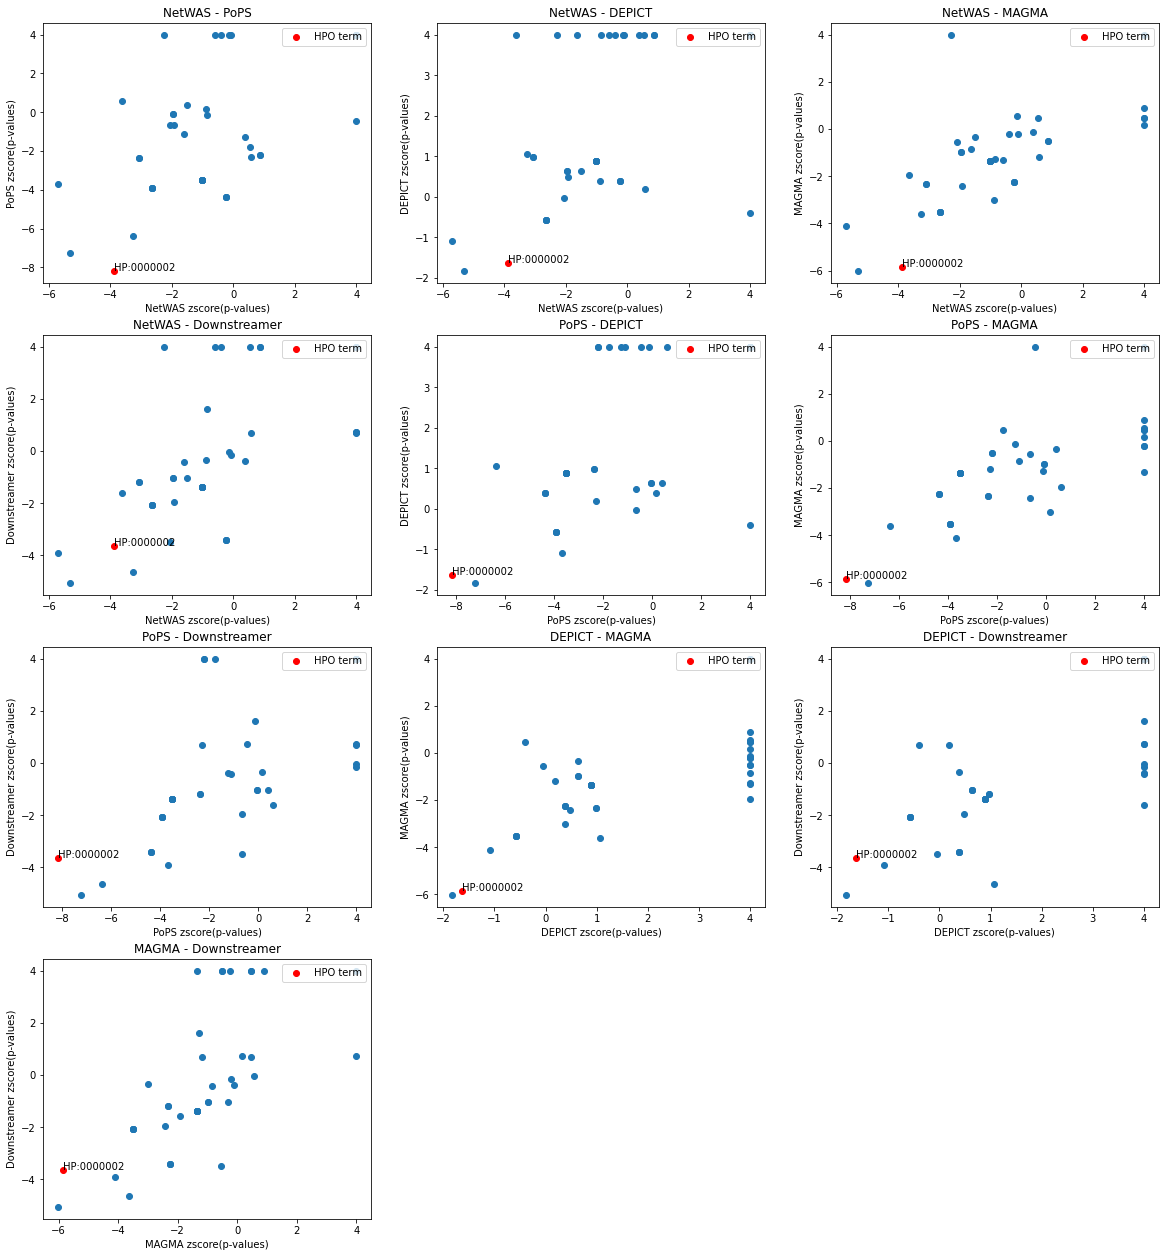

In [77]:
height_data = [("NetWAS", netwas_height_fish), ("PoPS", pops_height_fish), 
               ("DEPICT", depict_height_fish), ("MAGMA", magma_height_fish),
              ("Downstreamer", downstreamer_height_fish)]


plot_comparison_fisher_results(height_data, "height")

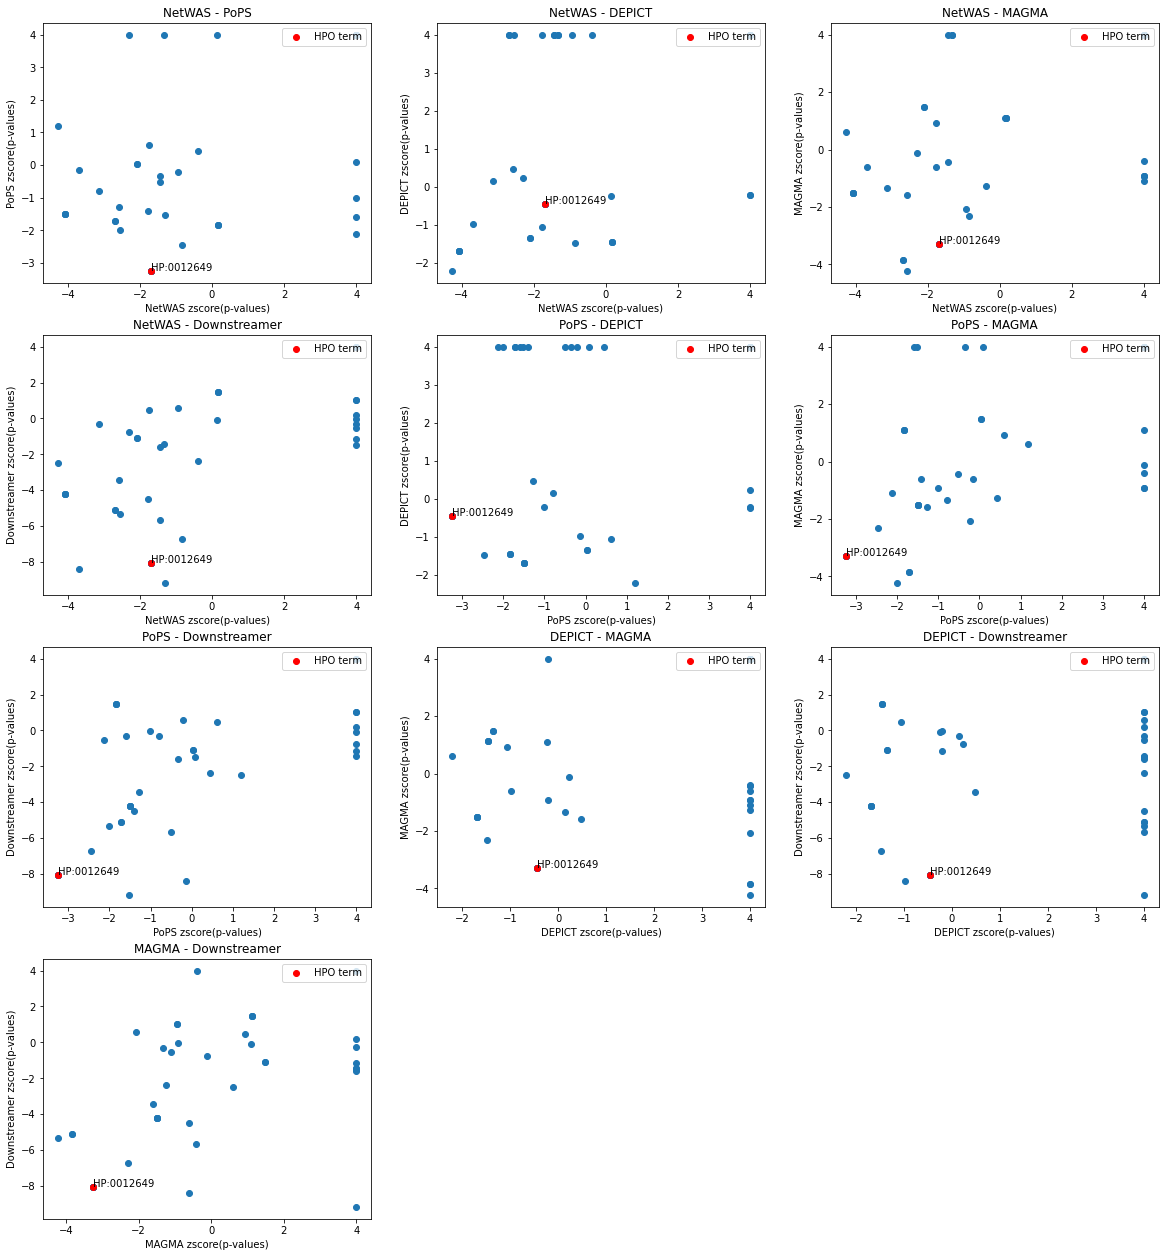

In [78]:
ibd_data = [("NetWAS", netwas_ibd_fish), ("PoPS", pops_ibd_fish), 
               ("DEPICT", depict_ibd_fish), ("MAGMA", magma_ibd_fish),
              ("Downstreamer", downstreamer_ibd_fish)]

plot_comparison_fisher_results(ibd_data, "inflammatory bowel disease")

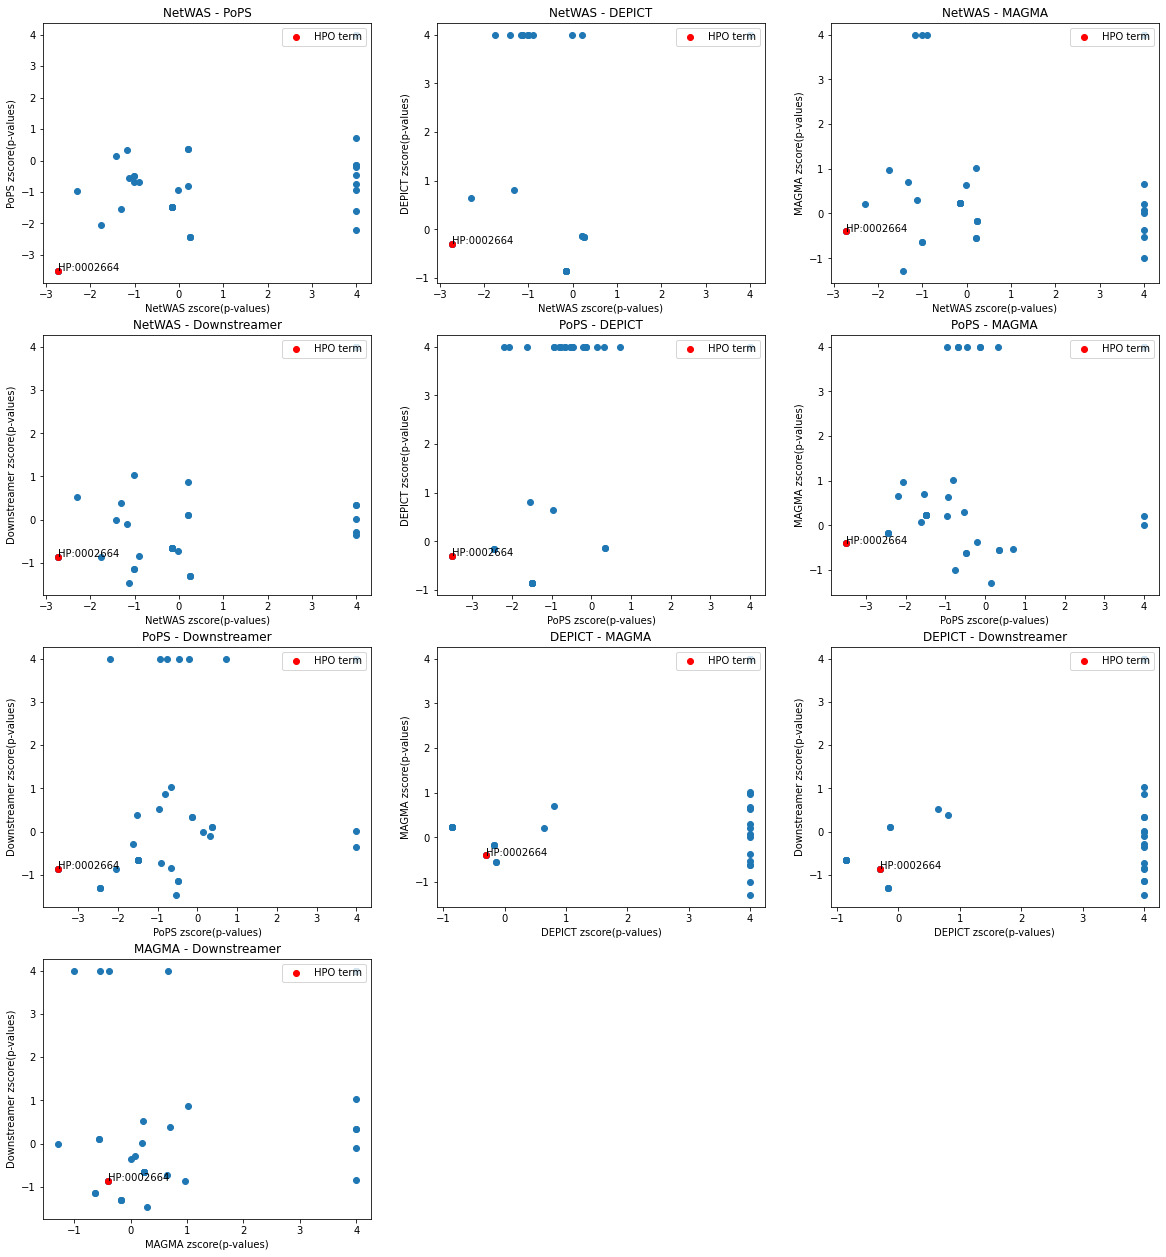

In [79]:
prst_data = [("NetWAS", netwas_prostate_fish), ("PoPS", pops_prostate_fish), 
               ("DEPICT", depict_prostate_fish), ("MAGMA", magma_prostate_fish),
              ("Downstreamer", downstreamer_prostate_fish)]

plot_comparison_fisher_results(prst_data, "Prostate cancer")

## Compare the scores of the different methods

C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)


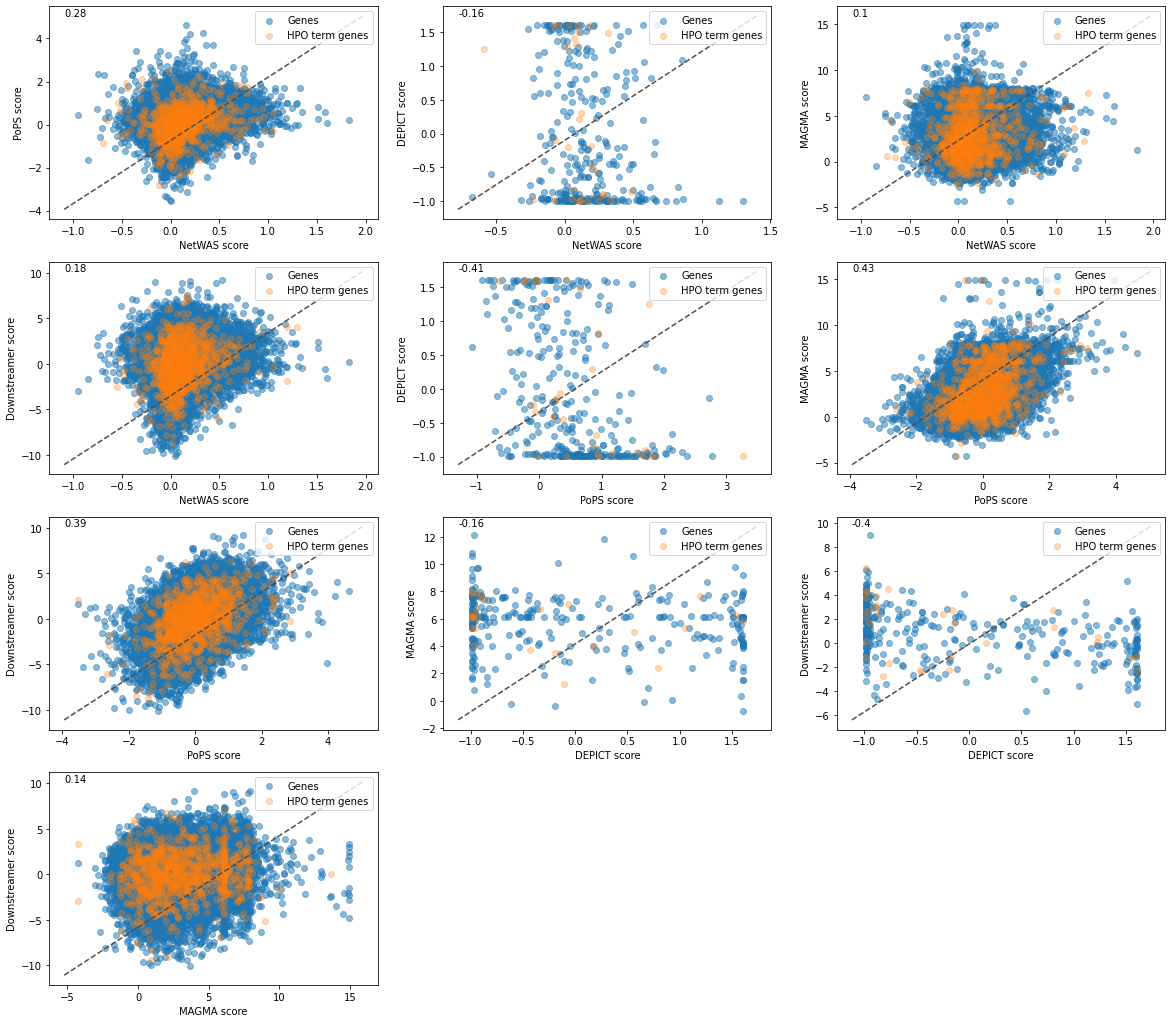

In [80]:
height_scores = [("NetWAS", netwas_results[["ensemble_id", "netwas_score"]]), 
                 ("PoPS", pops_height[["ENSGID", "PoPS_Score"]]), 
                 ("DEPICT", depict_height[["Ensembl Gene ID", "zscores"]]), 
                 ("MAGMA", magma_height[["GENE", "ZSTAT"]]),
                 ("Downstreamer", downstreamer_height[["Gene ID", "Enrichment Z-score"]])]

def plot_score_comparison(trait_data, hpo_data, hpo_term, trait): 
    plt.figure(figsize=(20, 18))
    # plt.suptitle(f'\n\nComparison gene scores for each method: {trait}', fontsize=18)

    # height_HPO = 'HP:0000002'
    hpo_term_genes = hpo_data.index[hpo_data[hpo_term] == 1].values

    for i, (method1, method2) in enumerate(combinations(trait_data,2)):
        plt.subplot(4, 3, i+1)
        # Take the overlap between two methods
        overlap = method1[1].iloc[:, 0].isin(method2[1].iloc[:, 0])
        # Filter the first method based on that overlap 
        method1_overlap = method1[1].loc[overlap, :]

        # Filter the second method based on that overlap 
        method2_overlap = method2[1][method2[1].iloc[:, 0].isin(method1_overlap.iloc[:, 0])]
        hpo_genes = method2_overlap.iloc[:, 0].isin(hpo_term_genes)

        # Sort the two data frames -> same order of genes
        method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)


        method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)

        x = method1_overlap.loc[~hpo_genes.values].iloc[:, 1]
        x_hpo = method1_overlap.loc[hpo_genes.values].iloc[:, 1]
        
        y = method2_overlap.loc[~hpo_genes.values].iloc[:, 1]
        y_hpo = method2_overlap.loc[hpo_genes.values].iloc[:, 1]
        
        corr, _ = pearsonr(x, y)

        plt.scatter(x, y, alpha=0.5, label="Genes")
        plt.scatter(x_hpo, y_hpo, alpha=0.3, label="HPO term genes")
        # plt.scatter(x, y, c=hpo_genes,alpha=0.5)

        plt.text(plt.xlim()[0], plt.ylim()[1] ,np.round(corr, 2))
        diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")

        # ax[i].set_title(f"{method1[0]} - {method2[0]}")
        plt.xlabel(f"{method1[0]} score"); plt.ylabel(f"{method2[0]} score")
        plt.legend(loc="upper right")

    # plt.savefig("compare_result_prostate.png")
    plt.show()
    
plot_score_comparison(trait_data=height_scores, hpo_data=hpo_data, hpo_term='HP:0000002', trait="Height")

C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)


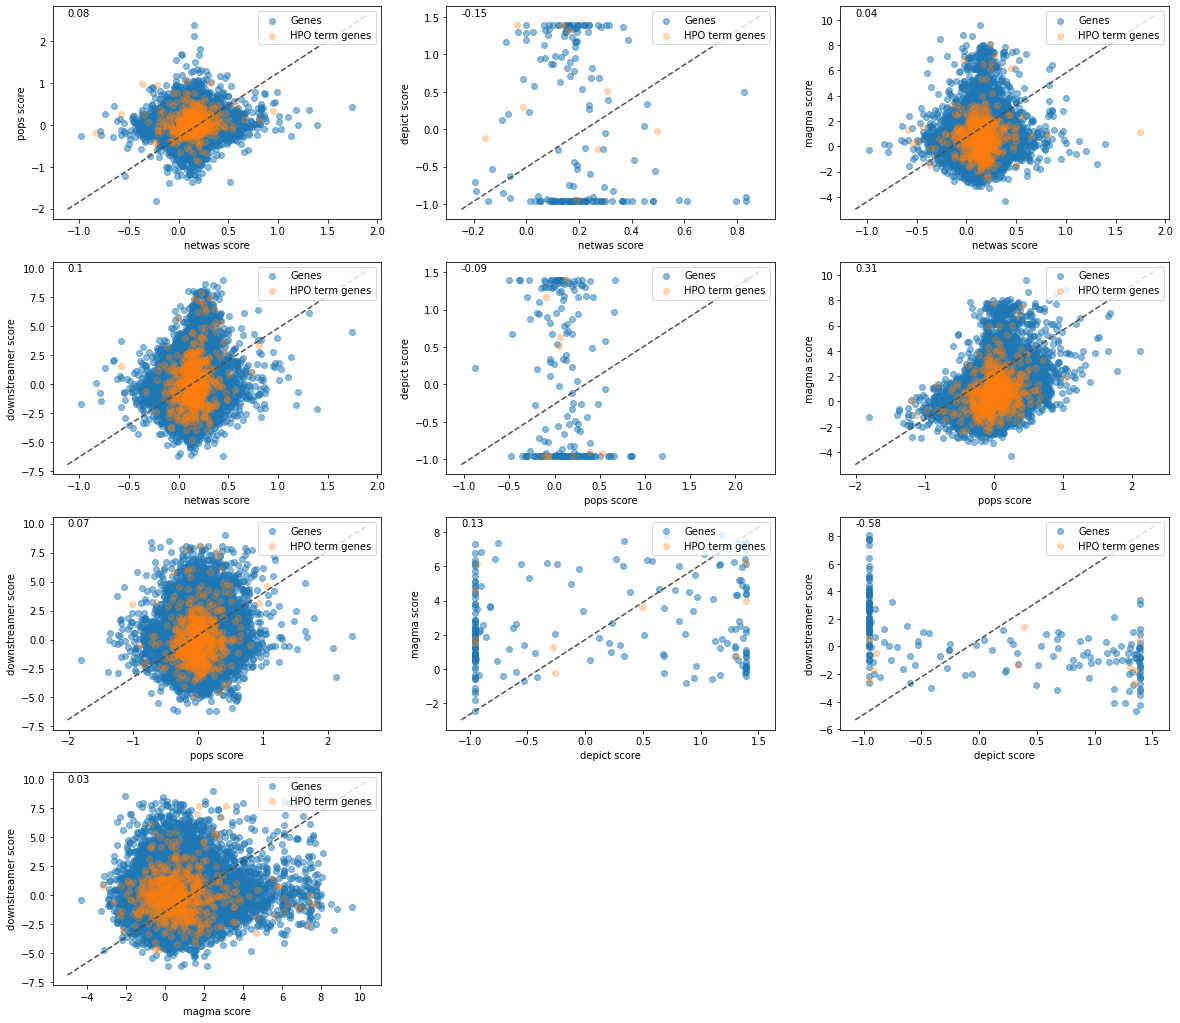

In [81]:
ibd_scores = [("netwas", netwas_results_ibd[["ensemble_id", "netwas_score"]]), 
                 ("pops", pops_ibd[["ENSGID", "PoPS_Score"]]), 
                 ("depict", depict_ibd[["Ensembl Gene ID", "zscores"]]), 
                 ("magma", magma_ibd[["GENE", "ZSTAT"]]),
                 ("downstreamer", downstreamer_ibd[["Gene ID", "Enrichment Z-score"]])]

plot_score_comparison(trait_data=ibd_scores, hpo_data=hpo_data, hpo_term='HP:0012649', trait="IBD")

C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)


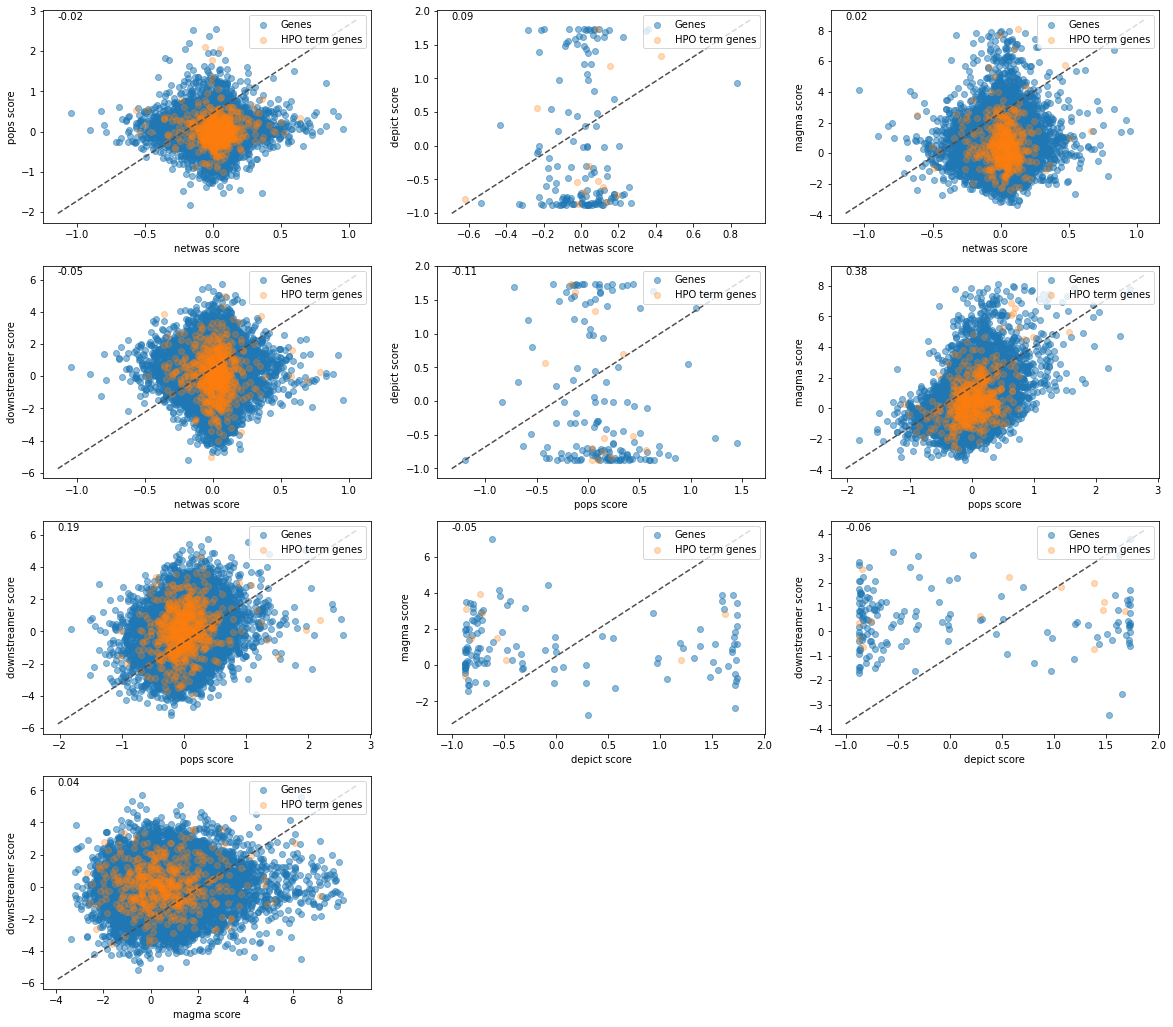

In [82]:
prst_scores = [("netwas", netwas_results_prostate[["ensemble_id", "netwas_score"]]), 
                 ("pops", pops_prostate[["ENSGID", "PoPS_Score"]]), 
                 ("depict", depict_prostate[["Ensembl Gene ID", "zscores"]]), 
                 ("magma", magma_prostate[["GENE", "ZSTAT"]]),
                 ("downstreamer", downstreamer_prostate[["Gene ID", "Enrichment Z-score"]])]

plot_score_comparison(trait_data=prst_scores, hpo_data=hpo_data, hpo_term='HP:0002664', trait="PrC")

# Plot comparison results methods

First plot: 
We want to see which method performs better for each trait. For this we make a bar plot, for each trait, on the x-axis we have the different methods and on the y-axis the percentage of prioritized genes found in the corresponding HPO term. 

Second plot:
We want to see the percentage of overlapping between each two methods for all the traits. From this we can see which methods prioritized similar genes. Use a stacked bar plot.

## Percentage found for HPO term

In [83]:
height_HPO = 'HP:0000002'

significant_netwas

gene_symbol      ensemble_id  netwas_score
0         PSMD14  ENSG00000115233      1.830570
1           BAG5  ENSG00000166170      1.599620
2          PSMC2  ENSG00000161057      1.582210
3          COPB1  ENSG00000129083      1.511820
4           CBX3  ENSG00000122565      1.510870
...          ...              ...           ...
1169       NUTF2  ENSG00000102898      0.500600
1170      AKAP10  ENSG00000108599      0.500402
1171        CD59  ENSG00000085063      0.500318
1172       FANCI  ENSG00000140525      0.500248
1173      CACUL1  ENSG00000151893      0.500074

[1108 rows x 3 columns]

In [84]:
def calculate_percentage_overlap(genes, hpo_term):
    total = len(genes)
    hpo_genes = hpo_data[hpo_data[hpo_term] == 1].index
    n_overlap = genes.isin(hpo_genes).sum()
    percentage_overlap = np.round((n_overlap / total) * 100, 2)
    return percentage_overlap
    

    
calculate_percentage_overlap(significant_netwas["ensemble_id"], height_HPO)

8.84

In [85]:
height_genes_methods = [("NetWAS", significant_netwas["ensemble_id"]), 
                 ("PoPS", significant_pops_height["ENSGID"]), 
                 ("DEPICT", significant_depict_height["Ensembl Gene ID"]), 
                 ("MAGMA", significant_magma_height["GENE"]),
                 ("Downstreamer", significant_downstreamer_height["Gene ID"])]


height_perc_overlap = {}

for method, genes in height_genes_methods:
    percentage = calculate_percentage_overlap(genes, height_HPO)
    height_perc_overlap[method] = percentage

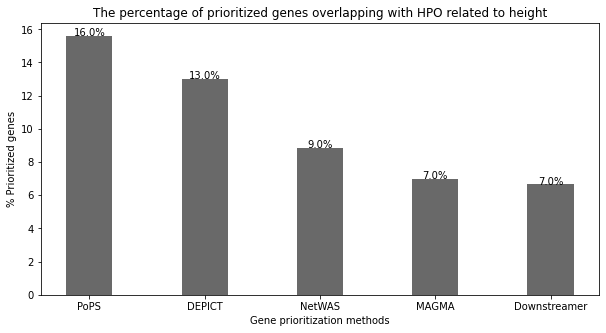

In [86]:
def addlabels(x,y, addition=""):
    for i in range(len(x)):
        plt.text(i, y[i], str(np.round(y[i], 0)) + addition, ha = 'center')

def plot_compare_overlap(methods, perc_overlap, hpo_term, figsize=(10, 5)):
    fig = plt.figure(figsize = figsize)

    # Sort from highest to lowest
    sorted_index = np.argsort(perc_overlap)[::-1]
    perc_overlap = np.array(perc_overlap)[sorted_index]
    methods = np.array(methods)[sorted_index]
    
    # creating the bar plot
    plt.bar(methods, perc_overlap, color="dimgrey",
            width = 0.4)
    
    addlabels(methods, perc_overlap, addition="%")

    plt.xlabel("Gene prioritization methods")
    plt.ylabel("% Prioritized genes")
    plt.title(f"The percentage of prioritized genes overlapping with HPO related to {hpo_term}")
    plt.show()
    
methods = list(height_perc_overlap.keys())
vals = list(height_perc_overlap.values())
    
plot_compare_overlap(methods, vals, "height")

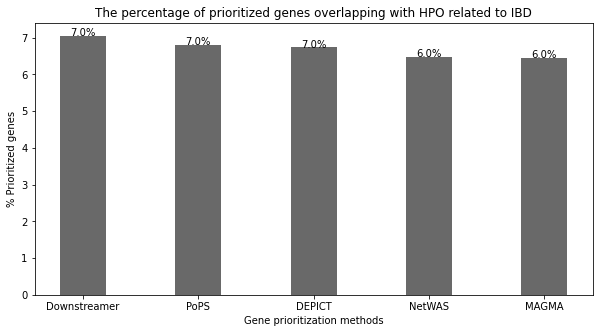

In [87]:
ibd_HPO = 'HP:0012649'

ibd_genes_methods = [("NetWAS", significant_netwas_ibd["ensemble_id"]), 
                 ("PoPS", significant_pops_ibd["ENSGID"]), 
                 ("DEPICT", significant_depict_ibd["Ensembl Gene ID"]), 
                 ("MAGMA", significant_magma_ibd["GENE"]),
                 ("Downstreamer", significant_downstreamer_ibd["Gene ID"])]


ibd_perc_overlap = {}

for method, genes in ibd_genes_methods:
    percentage = calculate_percentage_overlap(genes, ibd_HPO)
    ibd_perc_overlap[method] = percentage
    
methods = list(ibd_perc_overlap.keys())
vals = list(ibd_perc_overlap.values())
    
plot_compare_overlap(methods, vals, "IBD")

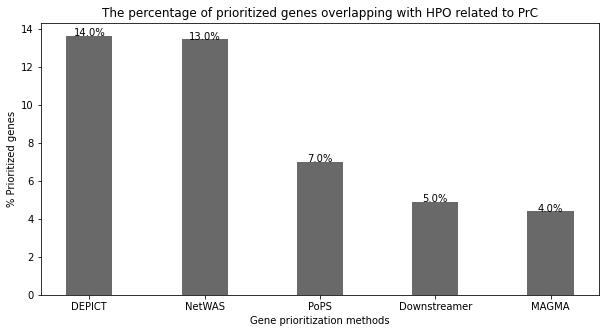

In [88]:
prostate_HPO = 'HP:0002664'

prostate_genes_methods = [("NetWAS", significant_netwas_prostate["ensemble_id"]), 
                 ("PoPS", significant_pops_prostate["ENSGID"]), 
                 ("DEPICT", significant_depict_prostate["Ensembl Gene ID"]), 
                 ("MAGMA", significant_magma_prostate["GENE"]),
                 ("Downstreamer", significant_downstreamer_prostate["Gene ID"])]


prostate_perc_overlap = {}

for method, genes in prostate_genes_methods:
    percentage = calculate_percentage_overlap(genes, prostate_HPO)
    prostate_perc_overlap[method] = percentage
    
methods = list(prostate_perc_overlap.keys())
vals = list(prostate_perc_overlap.values())
    
plot_compare_overlap(methods, vals, "PrC")

## Number of overlap in prioritized genes

In [89]:
def calculate_n_overlap_methods(genes_one, genes_two):
    # Take the top 500 genes instead
    n_overlap = genes_one.isin(genes_two).sum()
    return n_overlap

In [90]:
# Don't use the significant genes
all_genes_methods = [("NetWAS", [significant_netwas["ensemble_id"], significant_netwas_ibd["ensemble_id"], 
                                 significant_netwas_prostate["ensemble_id"]]), 
                 ("PoPS", [significant_pops_height["ENSGID"],significant_pops_ibd["ENSGID"],
                          significant_pops_prostate["ENSGID"]]), 
                 ("DEPICT", [significant_depict_height["Ensembl Gene ID"],significant_depict_ibd["Ensembl Gene ID"],
                            significant_depict_prostate["Ensembl Gene ID"]]), 
                 ("MAGMA", [significant_magma_height["GENE"],significant_magma_ibd["GENE"],
                           significant_magma_prostate["GENE"],]),
                 ("Downstreamer", [significant_downstreamer_height["Gene ID"], significant_downstreamer_ibd["Gene ID"],
                                  significant_downstreamer_prostate["Gene ID"]])]

In [91]:
barplot_overlap = pd.DataFrame(columns = ["methods", "height", "IBD", "PrC"])

for i, (method1, method2) in enumerate(combinations(all_genes_methods,2)):
    methods = f"{method1[0]} - {method2[0]}"
    n_overlap_height = calculate_n_overlap_methods(method1[1][0], method2[1][0])
    n_overlap_ibd = calculate_n_overlap_methods(method1[1][1], method2[1][1])
    n_overlap_prostate = calculate_n_overlap_methods(method1[1][2], method2[1][2])
    print(f"Overlap {method1[0]} - {method2[0]}: {n_overlap_height}, {n_overlap_ibd}, {n_overlap_prostate}")

    barplot_overlap.loc[len(barplot_overlap)] = [methods, n_overlap_height, n_overlap_ibd, n_overlap_prostate]

Overlap NetWAS - PoPS: 59, 12, 4
Overlap NetWAS - DEPICT: 14, 5, 0
Overlap NetWAS - MAGMA: 504, 11, 3
Overlap NetWAS - Downstreamer: 267, 24, 0
Overlap PoPS - DEPICT: 19, 10, 1
Overlap PoPS - MAGMA: 380, 80, 90
Overlap PoPS - Downstreamer: 219, 118, 19
Overlap DEPICT - MAGMA: 80, 22, 0
Overlap DEPICT - Downstreamer: 42, 35, 0
Overlap MAGMA - Downstreamer: 1870, 85, 12


In [92]:
barplot_overlap

methods  height  IBD  PrC
0          NetWAS - PoPS      59   12    4
1        NetWAS - DEPICT      14    5    0
2         NetWAS - MAGMA     504   11    3
3  NetWAS - Downstreamer     267   24    0
4          PoPS - DEPICT      19   10    1
5           PoPS - MAGMA     380   80   90
6    PoPS - Downstreamer     219  118   19
7         DEPICT - MAGMA      80   22    0
8  DEPICT - Downstreamer      42   35    0
9   MAGMA - Downstreamer    1870   85   12

## Compare top 500 genes for each method


In [93]:
def calculate_percentage_overlap_methods(genes_one, genes_two):
    # Take the top 500 genes instead
    if genes_one.shape[0] < genes_two.shape[0]:
        n_genes = genes_one.shape[0]
    else:
        n_genes = genes_two.shape[0]
    n_overlap = genes_one.isin(genes_two).sum()
    percentage_overlap = np.round((n_overlap / n_genes) * 100, 2)
    return percentage_overlap

In [94]:
top_genes_methods = [("NetWAS", [netwas_results.iloc[0:500, 1], netwas_results_ibd.iloc[0:500, 1], 
                                 netwas_results_prostate.iloc[0:500, 1]]), 
                 ("PoPS", [significant_pops_height["ENSGID"],significant_pops_ibd["ENSGID"],
                          significant_pops_prostate["ENSGID"]]), 
                 ("DEPICT", [depict_height.sort_values("Nominal P value").iloc[0:500, 3],
                             depict_ibd.sort_values("Nominal P value").iloc[0:500, 3],
                            depict_prostate.sort_values("Nominal P value").iloc[0:500, 3]]), 
                 ("MAGMA", [magma_height.sort_values("P").iloc[0:500, 0],
                            magma_ibd.sort_values("P").iloc[0:500, 0],
                           magma_prostate.sort_values("P").iloc[0:500, 0]]),
                 ("Downstreamer", [downstreamer_height.sort_values("Enrichment P-value").iloc[0:500, 0], 
                                   downstreamer_ibd.sort_values("Enrichment P-value").iloc[0:500, 0],
                                  downstreamer_prostate.sort_values("Enrichment P-value").iloc[0:500, 0]])]


In [95]:
calculate_percentage_overlap_methods(significant_pops_prostate["ENSGID"], magma_prostate.sort_values("P").iloc[0:500, 0])

19.6

In [96]:
calculate_percentage_overlap_methods(netwas_results.iloc[0:500, 1], depict_height.sort_values("Nominal P value").iloc[0:500, 3])

2.79

In [97]:
barplot_overlap = pd.DataFrame(columns = ["methods", "height", "IBD", "PrC"])

for i, (method1, method2) in enumerate(combinations(top_genes_methods,2)):
    methods = f"{method1[0]} - {method2[0]}"
    n_overlap_height = calculate_percentage_overlap_methods(method1[1][0], method2[1][0])
    n_overlap_ibd = calculate_percentage_overlap_methods(method1[1][1], method2[1][1])
    n_overlap_prostate = calculate_percentage_overlap_methods(method1[1][2], method2[1][2])
    print(f"Overlap {method1[0]} - {method2[0]}: {n_overlap_height}, {n_overlap_ibd}, {n_overlap_prostate}")
    # print(method2[1])
    barplot_overlap.loc[len(barplot_overlap)] = [methods, n_overlap_height, n_overlap_ibd, n_overlap_prostate]

Overlap NetWAS - PoPS: 5.4, 5.0, 3.6
Overlap NetWAS - DEPICT: 2.79, 6.51, 3.51
Overlap NetWAS - MAGMA: 2.0, 3.6, 4.2
Overlap NetWAS - Downstreamer: 0.8, 5.0, 1.0
Overlap PoPS - DEPICT: 9.39, 6.98, 6.43
Overlap PoPS - MAGMA: 15.0, 13.0, 19.6
Overlap PoPS - Downstreamer: 4.8, 12.4, 5.2
Overlap DEPICT - MAGMA: 9.14, 30.23, 5.85
Overlap DEPICT - Downstreamer: 1.27, 6.51, 2.92
Overlap MAGMA - Downstreamer: 1.2, 6.4, 3.8


In [98]:
barplot_overlap

methods  height    IBD    PrC
0          NetWAS - PoPS    5.40   5.00   3.60
1        NetWAS - DEPICT    2.79   6.51   3.51
2         NetWAS - MAGMA    2.00   3.60   4.20
3  NetWAS - Downstreamer    0.80   5.00   1.00
4          PoPS - DEPICT    9.39   6.98   6.43
5           PoPS - MAGMA   15.00  13.00  19.60
6    PoPS - Downstreamer    4.80  12.40   5.20
7         DEPICT - MAGMA    9.14  30.23   5.85
8  DEPICT - Downstreamer    1.27   6.51   2.92
9   MAGMA - Downstreamer    1.20   6.40   3.80

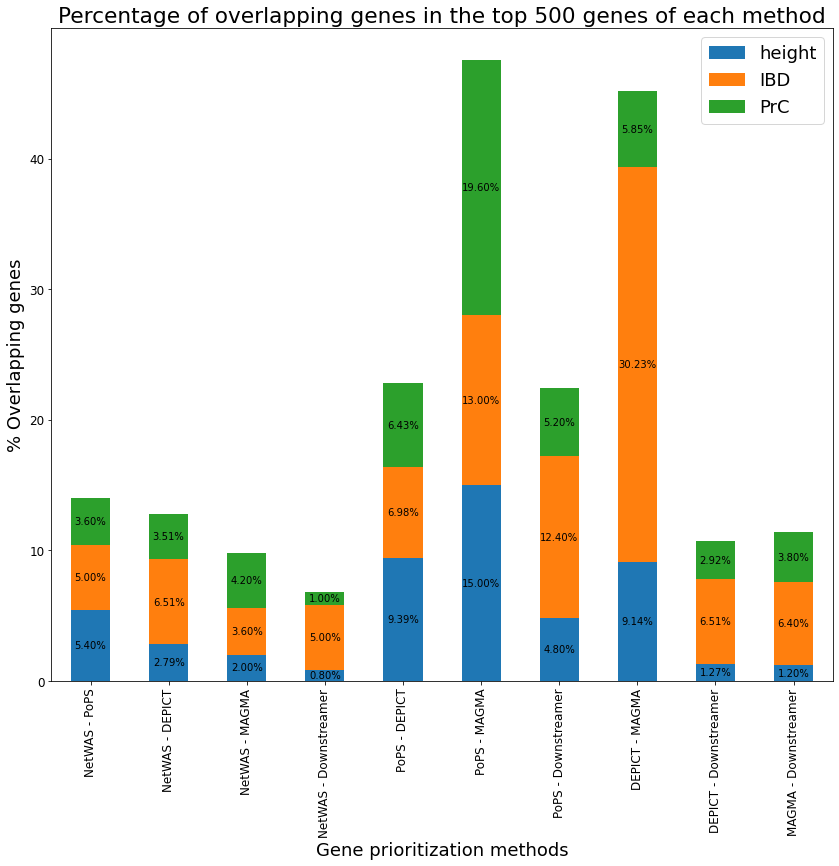

In [99]:

plt.rcParams.update({'font.size': 18}) # must set in top

ax = barplot_overlap.plot(x='methods', kind='bar', stacked=True,
        title='Percentage of overlapping genes in the top 500 genes of each method', figsize=(14, 12),
                         xlabel="Gene prioritization methods", 
                          ylabel="% Overlapping genes", fontsize=12)# color=['dimgrey','darkgray','silver']

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}%'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    
    # Only plot when either on of them is above 0
    if height > 0.0 or y > 0.0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        
# plt.savefig("top_500_genes.png")
plt.style.use('default')
plt.show()

## TT

C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\1912745630.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)


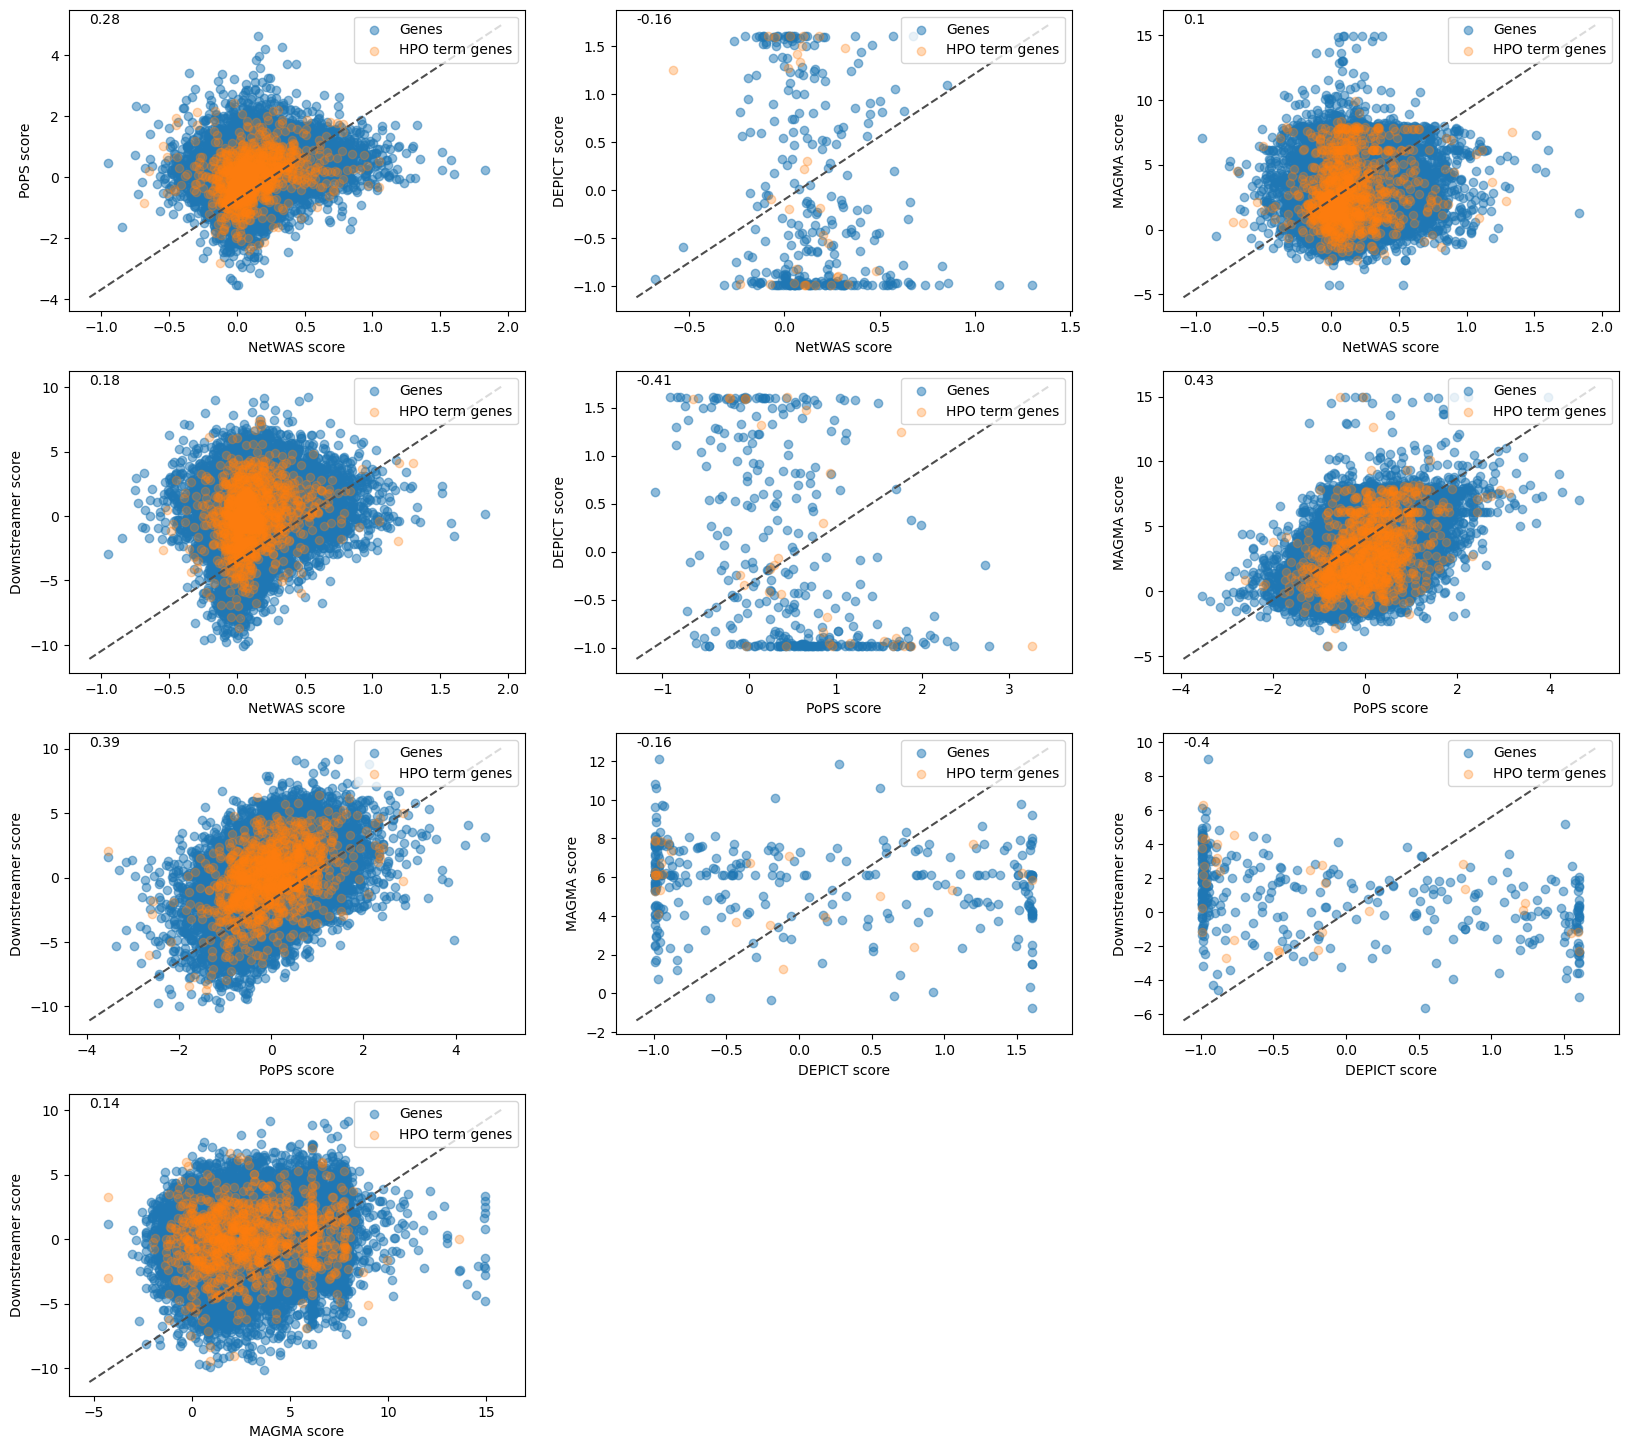

In [100]:
height_scores = [("NetWAS", netwas_results[["ensemble_id", "netwas_score"]]), 
                 ("PoPS", pops_height[["ENSGID", "PoPS_Score"]]), 
                 ("DEPICT", depict_height[["Ensembl Gene ID", "zscores"]]), 
                 ("MAGMA", magma_height[["GENE", "ZSTAT"]]),
                 ("Downstreamer", downstreamer_height[["Gene ID", "Enrichment Z-score"]])]

def plot_score_comparison(trait_data, hpo_data, hpo_term, trait): 
    plt.figure(figsize=(20, 18))
    # plt.suptitle(f'\n\nComparison gene scores for each method: {trait}', fontsize=18)

    # height_HPO = 'HP:0000002'
    hpo_term_genes = hpo_data.index[hpo_data[hpo_term] == 1].values

    for i, (method1, method2) in enumerate(combinations(trait_data,2)):
        plt.subplot(4, 3, i+1)
        # Take the overlap between two methods
        overlap = method1[1].iloc[:, 0].isin(method2[1].iloc[:, 0])
        # Filter the first method based on that overlap 
        method1_overlap = method1[1].loc[overlap, :]

        # Filter the second method based on that overlap 
        method2_overlap = method2[1][method2[1].iloc[:, 0].isin(method1_overlap.iloc[:, 0])]
        hpo_genes = method2_overlap.iloc[:, 0].isin(hpo_term_genes)

        # Sort the two data frames -> same order of genes
        method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)


        method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)

        x = method1_overlap.loc[~hpo_genes.values].iloc[:, 1]
        x_hpo = method1_overlap.loc[hpo_genes.values].iloc[:, 1]
        
        y = method2_overlap.loc[~hpo_genes.values].iloc[:, 1]
        y_hpo = method2_overlap.loc[hpo_genes.values].iloc[:, 1]
        
        corr, _ = pearsonr(x, y)

        plt.scatter(x, y, alpha=0.5, label="Genes")
        plt.scatter(x_hpo, y_hpo, alpha=0.3, label="HPO term genes")
        # plt.scatter(x, y, c=hpo_genes,alpha=0.5)

        plt.text(plt.xlim()[0], plt.ylim()[1] ,np.round(corr, 2))
        diag_line, = plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")

        # ax[i].set_title(f"{method1[0]} - {method2[0]}")
        plt.xlabel(f"{method1[0]} score"); plt.ylabel(f"{method2[0]} score")
        plt.legend(loc="upper right")

    # plt.savefig("compare_result_prostate.png")
    plt.show()
    
plot_score_comparison(trait_data=height_scores, hpo_data=hpo_data, hpo_term='HP:0000002', trait="Height")

In [101]:
def compare_gene_scores(method1, method2, hpo_data, hpo_term):
    hpo_term_genes = hpo_data.index[hpo_data[hpo_term] == 1].values

    # Take the overlap between two methods
    overlap = method1.iloc[:, 0].isin(method2.iloc[:, 0])
    # Filter the first method based on that overlap 
    method1_overlap = method1.loc[overlap, :]

    # Filter the second method based on that overlap 
    method2_overlap = method2[method2.iloc[:, 0].isin(method1_overlap.iloc[:, 0])]
    hpo_genes = method2_overlap.iloc[:, 0].isin(hpo_term_genes)

    # Sort the two data frames -> same order of genes
    method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)


    method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)

    x = method1_overlap.loc[~hpo_genes.values].iloc[:, 1]
    x_hpo = method1_overlap.loc[hpo_genes.values].iloc[:, 1]

    y = method2_overlap.loc[~hpo_genes.values].iloc[:, 1]
    y_hpo = method2_overlap.loc[hpo_genes.values].iloc[:, 1]

    corr, _ = pearsonr(x, y)
    
    return (x,y), (x_hpo, y_hpo), corr


def plot_compare_gene_score(xy, xy_hpo, ax, names):
    ax.scatter(xy[0], xy[1], alpha=0.5, label="Genes")
    ax.scatter(xy_hpo[0], xy_hpo[1], alpha=0.3, label="HPO term genes")
    # plt.scatter(x, y, c=hpo_genes,alpha=0.5)
    
    x_text = ax.set_xlim()[0]
    y_text = ax.set_ylim()[1]

    ax.text(x_text - (x_text / 100 * 10), y_text - (y_text / 100 * 10),np.round(corr, 2))
    diag_line, = ax.plot(ax.set_xlim(), ax.set_ylim(), ls="--", c=".3")

    ax.set_xlabel(f"{names[0]} score"); ax.set_ylabel(f"{names[1]} score")
    ax.legend(loc="upper right")

C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\3458625601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method1_overlap.sort_values(method1_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\3458625601.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method2_overlap.sort_values(method2_overlap.columns[0], ascending = False, inplace=True)
C:\Users\stijn\AppData\Local\Temp\ipykernel_25896\3458625601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

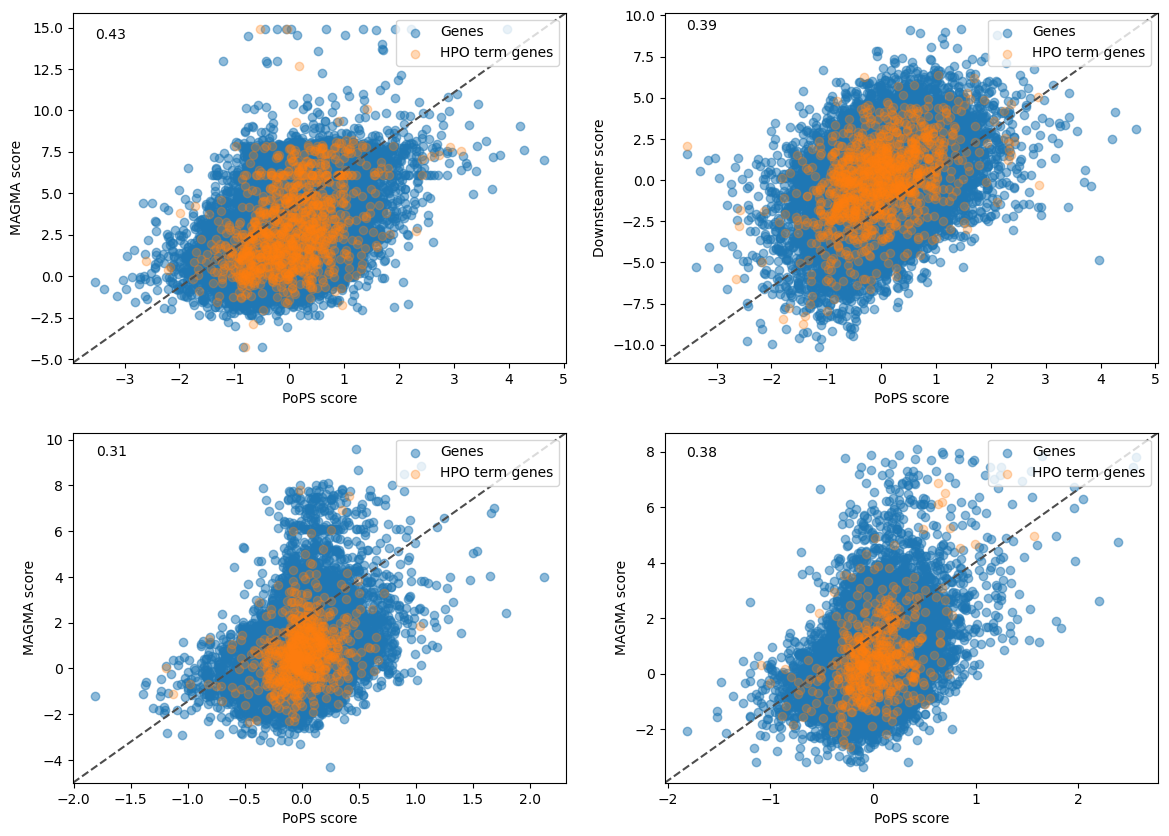

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Height
xy, xy_hpo, corr = compare_gene_scores(pops_height[["ENSGID", "PoPS_Score"]], magma_height[["GENE", "ZSTAT"]], hpo_data, height_HPO)
plot_compare_gene_score(xy, xy_hpo, axes[0, 0], ["PoPS", "MAGMA"])

xy, xy_hpo, corr = compare_gene_scores(pops_height[["ENSGID", "PoPS_Score"]], downstreamer_height[["Gene ID", "Enrichment Z-score"]], hpo_data, height_HPO)
plot_compare_gene_score(xy, xy_hpo, axes[0, 1], ["PoPS", "Downsteamer"])

xy, xy_hpo, corr = compare_gene_scores(pops_ibd[["ENSGID", "PoPS_Score"]], magma_ibd[["GENE", "ZSTAT"]], hpo_data, ibd_HPO)
plot_compare_gene_score(xy, xy_hpo, axes[1, 0], ["PoPS", "MAGMA"])

xy, xy_hpo, corr = compare_gene_scores(pops_prostate[["ENSGID", "PoPS_Score"]], magma_prostate[["GENE", "ZSTAT"]], hpo_data, prostate_HPO)
plot_compare_gene_score(xy, xy_hpo, axes[1, 1], ["PoPS", "MAGMA"])

In [103]:
def compare_fisher_results(method1, method2, hpo_trait):
    trait_index = method1["GWAS trait"].str.lower() == hpo_trait.lower()

    x = method1[~trait_index].zscores
    y = method2[~trait_index].zscores

    x_hpo = method1[trait_index].zscores
    y_hpo = method2[trait_index].zscores

    hpo_id = method1[trait_index]["HPO ID"].values[0]
    
    return (x,y), (x_hpo, y_hpo), hpo_id
    
    
def plot_compare_fisher_results(xy, xy_hpo, hpo_id, ax, names):
    ax.scatter(xy[0], xy[1])
    ax.scatter(xy_hpo[0], xy_hpo[1], c = 'r', label="HPO term genes")

    # hpo_id = method1[1][trait_index]["HPO ID"].values[0]

    ax.text(xy_hpo[0], xy_hpo[1], hpo_id)
    ax.set_title(f"{names[0]} - {names[1]}")
    # plt.xlabel(f"{method1[0]} zscore(p-values)"); plt.ylabel(f"{method2[0]} zscore(p-values)")
    ax.set_xlabel(f"{names[0]} zscore(p-values)"); ax.set_ylabel(f"{names[1]} zscore(p-values)")
    ax.legend(loc="upper right")
    

# xy, xy_hpo, hpo_id = compare_fisher_results(depict_height_fish, magma_height_fish, "Height")
# plot_compare_fisher_results(xy, xy_hpo, hpo_id)


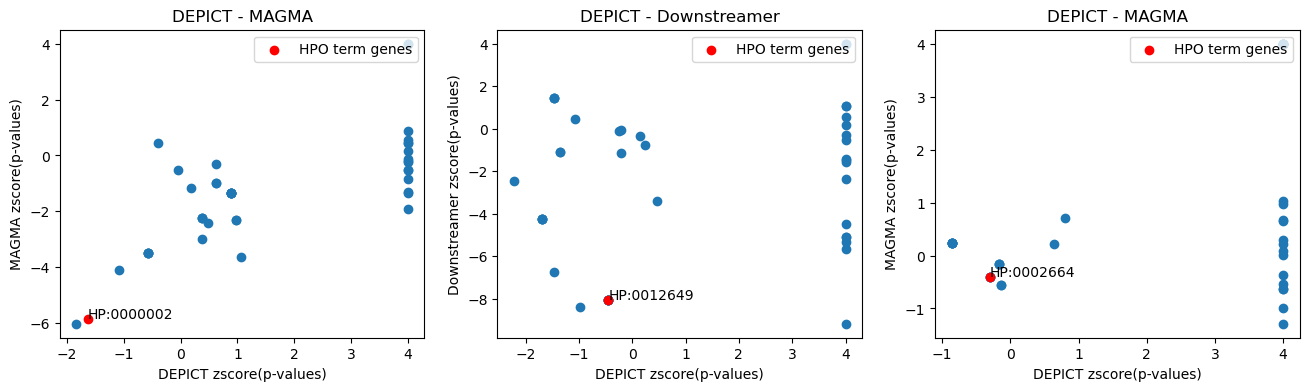

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

xy, xy_hpo, hpo_id = compare_fisher_results(depict_height_fish, magma_height_fish, "Height")
plot_compare_fisher_results(xy, xy_hpo, hpo_id, ax=axes[0], names=["DEPICT", "MAGMA"])

xy, xy_hpo, hpo_id = compare_fisher_results(depict_ibd_fish, downstreamer_ibd_fish, "inflammatory bowel disease")
plot_compare_fisher_results(xy, xy_hpo, hpo_id, ax=axes[1], names=["DEPICT", "Downstreamer"])

xy, xy_hpo, hpo_id = compare_fisher_results(depict_prostate_fish, magma_prostate_fish, "prostate cancer")
plot_compare_fisher_results(xy, xy_hpo, hpo_id, ax=axes[2], names=["DEPICT", "MAGMA"])

plt.show()